# Initialisation

## Chargement "dataCompleted" : 
Données imputées

In [1]:
from functions import *
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats as st
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import pprint
from tabulate import tabulate
import sys
from itertools import combinations 
from scipy import spatial
from sklearn.linear_model import LinearRegression
from scipy import stats
import researchpy as rp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from sklearn.cluster import KMeans
from sklearn import decomposition
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing



sns.set()


dataCompleted = pd.read_csv("donneeCompleted.csv", sep='\t')
dataCompleted = dataCompleted.drop(columns="Unnamed: 0")
dataCompleted = dataCompleted.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})


xlabel = dataCompleted.columns
fig = plt.figure(figsize=(15, 4))
plot = fig.add_subplot(1, 1, 1)
plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)


fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
xxticks = mtick.FormatStrFormatter(fmt)

# yaxis

plot.yaxis.set_major_formatter(xxticks)

plt.ylabel("% de valeur non NaN", fontsize=20)


plt.show()

dataCompleted


<Figure size 1500x400 with 1 Axes>

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,Vitória crackers,NaN,1569.000000,3.08,15.000000,2.530000,7.800000,0.560000
1,moutarde au moût de raisin,18.0,936.000000,2.20,22.000000,0.000000,5.100000,1.811024
2,Sauce Sweety chili 0%,NaN,88.000000,0.00,0.400000,1.675263,0.200000,0.816000
3,Mini coco,NaN,251.000000,1.00,3.000000,1.578947,2.000000,0.460000
4,Sachet calisson,NaN,1104.859113,0.09,53.481053,4.550166,1.073684,0.000000
...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,1469.000000,0.00,0.000000,1.331579,7.000000,0.000000
864417,Boules,NaN,1556.000000,1.30,54.000000,4.205263,6.300000,0.008000
864418,Minis beignets,15.0,1393.000000,6.00,10.400000,3.166316,7.400000,0.440000
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,925.000000,4.80,24.000000,0.368421,2.600000,0.112000


## Chargement dataTrain et dataTest 

In [2]:
dataTrain = pd.read_csv("dataTrain.csv", sep='\t')
dataTest = pd.read_csv("dataTest.csv", sep='\t')

dataTrain = dataTrain.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})
dataTest = dataTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})



dataTrain = dataTrain.drop(columns="Unnamed: 0")
dataTest = dataTest.drop(columns="Unnamed: 0")

dataXTrain = dataTrain.loc[:,"energy_100g":"sodium_100g" ]
dataXTrain

,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,936.0,2.20,22.00,0.00,5.10,1.811024
1,1594.0,15.50,21.90,4.40,4.60,0.040000
2,657.0,0.00,27.00,3.60,0.60,0.000000
3,669.0,0.50,0.60,1.60,9.50,0.143200
4,1255.0,0.00,66.67,10.00,0.00,0.000000
...,...,...,...,...,...,...
104511,1390.0,3.24,21.20,7.65,7.65,0.388000
104512,2629.0,4.46,4.34,9.70,14.95,0.000000
104513,318.0,0.00,11.70,0.00,7.10,0.040000
104514,4.0,1.00,3.00,5.30,8.90,0.400000


## Detection valeurs abhérantes multivariées

### sur dataCompleted

In [3]:
dataMasse = dataCompleted.loc[:, 'saturated_fat_100g'] + dataCompleted.loc[:, 'sugars_100g'] + \
    dataCompleted.loc[:, 'fiber_100g'] + dataCompleted.loc[:,
                                                           'proteins_100g'] + dataCompleted.loc[:, 'sodium_100g']

In [4]:
dataCompleted["masseTotale"] = dataMasse

In [5]:
dataCompleted.shape

(864421, 9)

In [6]:
dataCompleted.loc[dataCompleted["masseTotale"]>100].index

Int64Index([   325,   1570,   1690,   1876,   2070,   2344,   4206,   5803,
              7204,   9916,
            ...
            859721, 860387, 860674, 861154, 861715, 862160, 863283, 863439,
            864082, 864093],
           dtype='int64', length=621)

In [7]:

dataCompleted = dataCompleted.drop(dataCompleted.loc[dataCompleted["masseTotale"]>100].index)


In [8]:
dataCompletedClean = dataCompleted.copy()

In [9]:
dataCompletedClean

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,1569.000000,3.08,15.000000,2.530000,7.800000,0.560000,28.970000
1,moutarde au moût de raisin,18.0,936.000000,2.20,22.000000,0.000000,5.100000,1.811024,31.111024
2,Sauce Sweety chili 0%,NaN,88.000000,0.00,0.400000,1.675263,0.200000,0.816000,3.091263
3,Mini coco,NaN,251.000000,1.00,3.000000,1.578947,2.000000,0.460000,8.038947
4,Sachet calisson,NaN,1104.859113,0.09,53.481053,4.550166,1.073684,0.000000,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,1469.000000,0.00,0.000000,1.331579,7.000000,0.000000,8.331579
864417,Boules,NaN,1556.000000,1.30,54.000000,4.205263,6.300000,0.008000,65.813263
864418,Minis beignets,15.0,1393.000000,6.00,10.400000,3.166316,7.400000,0.440000,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,925.000000,4.80,24.000000,0.368421,2.600000,0.112000,31.880421


### sur dataTrain

In [10]:
dataMasse = dataTrain.loc[:, 'saturated_fat_100g'] + dataTrain.loc[:, 'sugars_100g'] + \
    dataTrain.loc[:, 'fiber_100g'] + dataTrain.loc[:,
                                                           'proteins_100g'] + dataTrain.loc[:, 'sodium_100g']

In [11]:
dataTrain["masseTotale"] = dataMasse

In [12]:
dataTrain.shape

(104516, 9)

In [13]:
dataTrain.loc[dataTrain["masseTotale"]>100].index

Int64Index([  1689,   1720,   1891,   1893,   3835,   4047,   6839,   6935,
              8415,   9043,  10272,  10480,  11555,  11557,  12779,  13155,
             14670,  16627,  19453,  20193,  20557,  21736,  21978,  22133,
             22145,  25000,  25193,  25509,  34784,  35687,  38646,  40320,
             40961,  41421,  53351,  56707,  56958,  67846,  68438,  70728,
             70798,  72011,  72051,  72053,  73031,  74268,  74333,  75695,
             76373,  78034,  79917,  83739,  83809,  84127,  84412,  85816,
             86016,  86297,  86307,  86322,  87073,  87124,  87146,  87214,
             90504,  91109,  91693,  92427,  92485,  97690, 100615, 103141,
            103143, 103528, 104128],
           dtype='int64')

In [14]:

dataTrain = dataTrain.drop(dataCompleted.loc[dataCompleted["masseTotale"]>100].index)


In [15]:
dataTrain.shape

(104516, 9)

## Fit transform dataXTrain 
Fit les variables sauf nutri score en standart

In [16]:
scaler = StandardScaler()
scaler.fit(dataXTrain)
dataXTrainScaled = scaler.transform(dataXTrain)
dataXTrainScaled

dataTrainScaled = dataTrain.copy()

dataTrainScaled.loc[:,"energy_100g":"sodium_100g" ] = dataXTrainScaled
dataTrainScaled

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,moutarde au moût de raisin,18.0,-0.234327,-0.319826,0.543014,-0.640046,-0.330399,0.811190,31.111024
1,Tarte noix de coco,14.0,0.617739,1.520912,0.537230,0.322721,-0.391516,-0.208637,46.440000
2,Compote de poire,-2.0,-0.595613,-0.624309,0.832192,0.147672,-0.880454,-0.231670,31.200000
3,BAguette bressan,-4.0,-0.580074,-0.555108,-0.694671,-0.289949,0.207432,-0.149210,12.343200
4,Cranberries,3.0,0.178757,-0.624309,3.126536,1.548060,-0.953795,-0.231670,76.670000
...,...,...,...,...,...,...,...,...,...
104511,fibre 5 fruits secs,10.0,0.353572,-0.175889,0.496745,1.033855,-0.018702,-0.008244,40.128000
104512,Noisettes,-4.0,1.957994,-0.007039,-0.478366,1.482417,0.873610,-0.231670,33.450000
104513,Deli'light fromage blanc saveur vanille 0%,-2.0,-1.034595,-0.624309,-0.052695,-0.640046,-0.085930,-0.208637,18.840000
104514,Spécial k test pau,-6.0,-1.441204,-0.485908,-0.555865,0.519650,0.134091,-0.001334,18.600000


## Normalise dataCompleted avec le fit de dataXTrain

In [17]:
dataScaled = dataCompleted.copy()

dataScaled.loc[:, "energy_100g":"sodium_100g"]=scaler.transform(dataCompleted.loc[:, "energy_100g":"sodium_100g"])
dataScaled

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,0.585365,-0.198033,0.138163,-0.086455,-0.000366,0.090800,28.970000
1,moutarde au moût de raisin,18.0,-0.234327,-0.319826,0.543014,-0.640046,-0.330399,0.811190,31.111024
2,Sauce Sweety chili 0%,NaN,-1.332430,-0.624309,-0.706238,-0.273481,-0.929348,0.238215,3.091263
3,Mini coco,NaN,-1.121356,-0.485908,-0.555865,-0.294556,-0.709326,0.033216,8.038947
4,Sachet calisson,NaN,-0.015666,-0.611853,2.363743,0.355579,-0.822554,-0.231670,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,0.455872,-0.624309,-0.729373,-0.348683,-0.098154,-0.231670,8.331579
864417,Boules,NaN,0.568531,-0.444387,2.393757,0.280110,-0.183718,-0.227064,65.813263
864418,Minis beignets,15.0,0.357457,0.206099,-0.127881,0.052777,-0.049260,0.021699,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.248571,0.040017,0.658685,-0.559432,-0.635985,-0.167176,31.880421


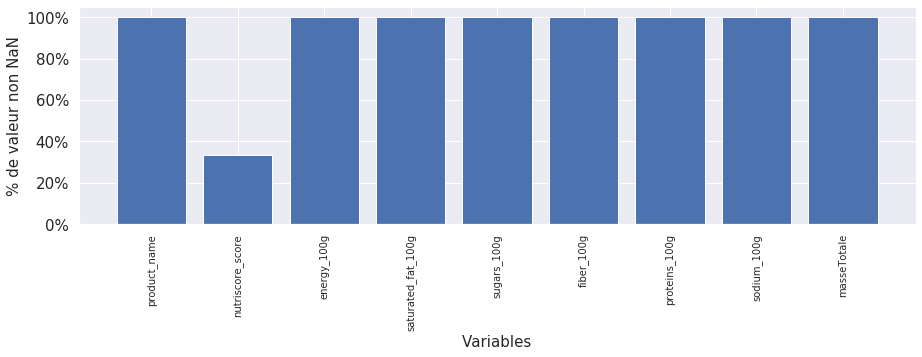

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,1569.000000,3.08,15.000000,2.530000,7.800000,0.560000,28.970000
1,moutarde au moût de raisin,18.0,936.000000,2.20,22.000000,0.000000,5.100000,1.811024,31.111024
2,Sauce Sweety chili 0%,NaN,88.000000,0.00,0.400000,1.675263,0.200000,0.816000,3.091263
3,Mini coco,NaN,251.000000,1.00,3.000000,1.578947,2.000000,0.460000,8.038947
4,Sachet calisson,NaN,1104.859113,0.09,53.481053,4.550166,1.073684,0.000000,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,1469.000000,0.00,0.000000,1.331579,7.000000,0.000000,8.331579
864417,Boules,NaN,1556.000000,1.30,54.000000,4.205263,6.300000,0.008000,65.813263
864418,Minis beignets,15.0,1393.000000,6.00,10.400000,3.166316,7.400000,0.440000,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,925.000000,4.80,24.000000,0.368421,2.600000,0.112000,31.880421


In [18]:
xlabel = dataCompleted.columns
fig = plt.figure(figsize=(15, 4))
plot = fig.add_subplot(1, 1, 1)
plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
xxticks = mtick.FormatStrFormatter(fmt)

# yaxis

plot.yaxis.set_major_formatter(xxticks)

plt.xlabel("Variables", fontsize=15)
plt.ylabel("% de valeur non NaN", fontsize=15)


plt.show()

dataCompleted

# Detection valeurs abhérente multivariées 

## à la main

In [19]:
dataMasse = dataCompleted.loc[:, 'saturated_fat_100g'] + dataCompleted.loc[:, 'sugars_100g'] + \
    dataCompleted.loc[:, 'fiber_100g'] + dataCompleted.loc[:,
                                                           'proteins_100g'] + dataCompleted.loc[:, 'sodium_100g']

In [20]:
dataCompleted["masseTotale"] = dataMasse

In [21]:
dataCompleted.shape

(863800, 9)

In [22]:
dataCompleted.loc[dataCompleted["masseTotale"]>100].index

Int64Index([], dtype='int64')

In [23]:

dataCompleted = dataCompleted.drop(dataCompleted.loc[dataCompleted["masseTotale"]>100].index)


In [24]:
dataCompletedClean = dataCompleted.copy()

In [25]:
dataCompleted.shape

(863800, 9)

In [26]:
dataCompleted

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,1569.000000,3.08,15.000000,2.530000,7.800000,0.560000,28.970000
1,moutarde au moût de raisin,18.0,936.000000,2.20,22.000000,0.000000,5.100000,1.811024,31.111024
2,Sauce Sweety chili 0%,NaN,88.000000,0.00,0.400000,1.675263,0.200000,0.816000,3.091263
3,Mini coco,NaN,251.000000,1.00,3.000000,1.578947,2.000000,0.460000,8.038947
4,Sachet calisson,NaN,1104.859113,0.09,53.481053,4.550166,1.073684,0.000000,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,1469.000000,0.00,0.000000,1.331579,7.000000,0.000000,8.331579
864417,Boules,NaN,1556.000000,1.30,54.000000,4.205263,6.300000,0.008000,65.813263
864418,Minis beignets,15.0,1393.000000,6.00,10.400000,3.166316,7.400000,0.440000,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,925.000000,4.80,24.000000,0.368421,2.600000,0.112000,31.880421


In [27]:
# column = "energy_100g"
# x = dataCompleted.loc[:,column]
# print(x[x.between(x.quantile(0.00), x.quantile(0.01))].size)
# print(x[x.between(x.quantile(0.99), x.quantile(1.))].size)
# i=0
# for index in x[x.between(x.quantile(0.00), x.quantile(0.01))].index:
#     dataCompleted.loc[index,column] = np.nan
#     if (i/100).is_integer() : print(i)
#     i += 1


In [28]:
# print(dataCompleted.shape)
# # data = data.dropna(subset=['product_name'])

In [29]:
# dataCompleted = dataCompleted.dropna(subset=['energy_100g'])

In [30]:
# print(dataCompleted.shape)

# TESTS

In [31]:


dataXTrain
dataTrain

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,moutarde au moût de raisin,18.0,936.0,2.20,22.00,0.00,5.10,1.811024,31.111024
1,Tarte noix de coco,14.0,1594.0,15.50,21.90,4.40,4.60,0.040000,46.440000
2,Compote de poire,-2.0,657.0,0.00,27.00,3.60,0.60,0.000000,31.200000
3,BAguette bressan,-4.0,669.0,0.50,0.60,1.60,9.50,0.143200,12.343200
4,Cranberries,3.0,1255.0,0.00,66.67,10.00,0.00,0.000000,76.670000
...,...,...,...,...,...,...,...,...,...
104511,fibre 5 fruits secs,10.0,1390.0,3.24,21.20,7.65,7.65,0.388000,40.128000
104512,Noisettes,-4.0,2629.0,4.46,4.34,9.70,14.95,0.000000,33.450000
104513,Deli'light fromage blanc saveur vanille 0%,-2.0,318.0,0.00,11.70,0.00,7.10,0.040000,18.840000
104514,Spécial k test pau,-6.0,4.0,1.00,3.00,5.30,8.90,0.400000,18.600000


## Kolmogorov : test normal

### Nutriscore

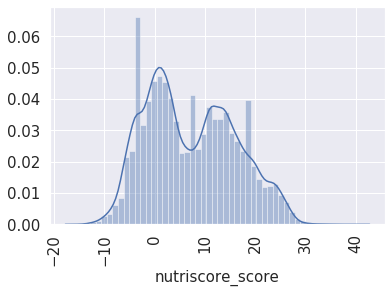

p = 0
The null hypothesis can be rejected


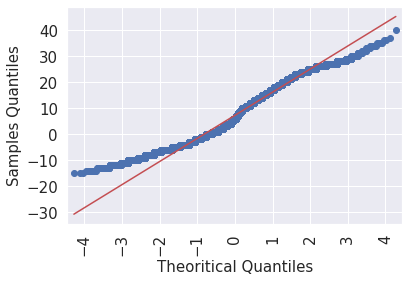

In [32]:
variable = 'nutriscore_score'

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Variables", fontsize=15)
sns.distplot(dataTrain[variable], kde=True)

plt.show()

k2, p = stats.normaltest(dataTrain[variable])

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(dataTrain[variable], line="s")


plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Theoritical Quantiles", fontsize=15)
plt.ylabel("Samples Quantiles", fontsize=15)


plt.show()










plt.show()

### Energy

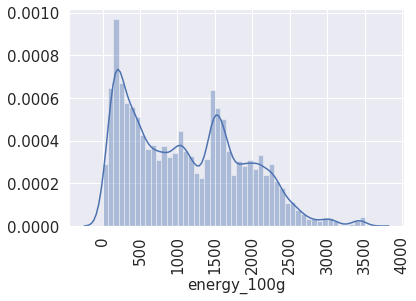

p = 0
The null hypothesis can be rejected


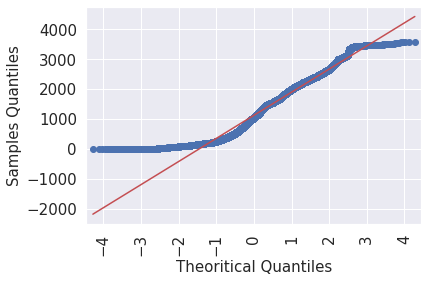

In [33]:
variable = 'energy_100g'


plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Variables", fontsize=15)
sns.distplot(dataTrain[variable], kde=True)

plt.show()

k2, p = stats.normaltest(dataTrain[variable])

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(dataTrain[variable], line="s")


plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Theoritical Quantiles", fontsize=15)
plt.ylabel("Samples Quantiles", fontsize=15)


plt.show()


### Saturated-fat

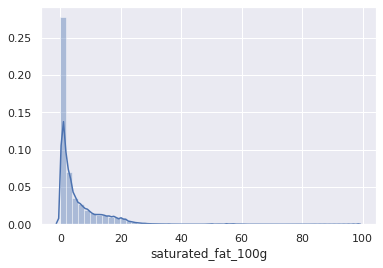

p = 0
The null hypothesis can be rejected


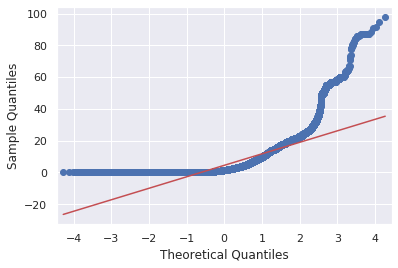

In [34]:
variable = 'saturated_fat_100g'

sns.distplot(dataTrain[variable], kde=True)

plt.show()

k2, p = stats.normaltest(dataTrain[variable])

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(dataTrain[variable], line="s")
plt.show()

### Sugars

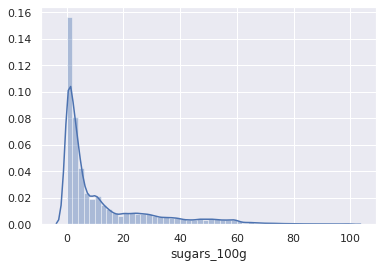

p = 0
The null hypothesis can be rejected


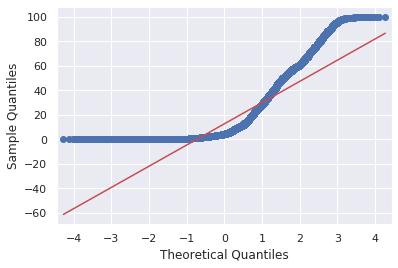

In [35]:
variable = 'sugars_100g'

sns.distplot(dataTrain[variable], kde=True)

plt.show()

k2, p = stats.normaltest(dataTrain[variable])

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(dataTrain[variable], line="s")
plt.show()

### Fiber

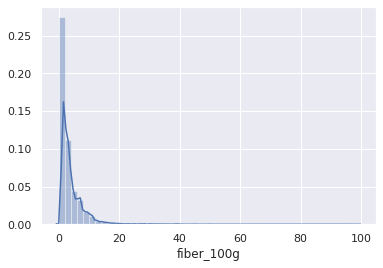

p = 0
The null hypothesis can be rejected


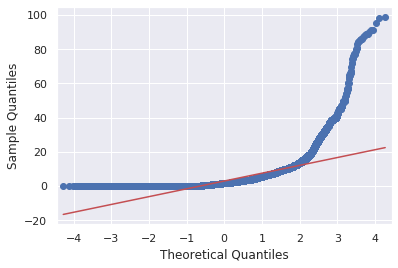

In [36]:
variable = 'fiber_100g'

sns.distplot(dataTrain[variable], kde=True)

plt.show()

k2, p = stats.normaltest(dataTrain[variable])

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(dataTrain[variable], line="s")
plt.show()

### Proteins

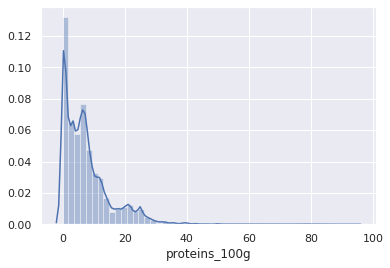

p = 0
The null hypothesis can be rejected


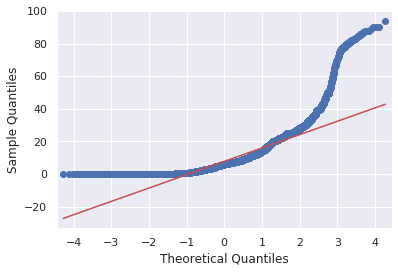

In [37]:
variable = 'proteins_100g'

sns.distplot(dataTrain[variable], kde=True)

plt.show()

k2, p = stats.normaltest(dataTrain[variable])

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(dataTrain[variable], line="s")
plt.show()

### Sodium

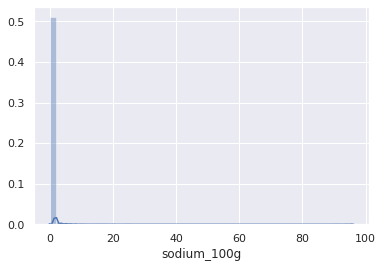

p = 0
The null hypothesis can be rejected


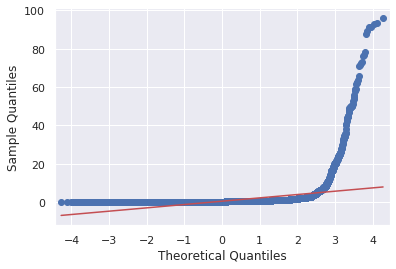

In [38]:
variable = 'sodium_100g'

sns.distplot(dataTrain[variable], kde=True)

plt.show()

k2, p = stats.normaltest(dataTrain[variable])

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(dataTrain[variable], line="s")
plt.show()

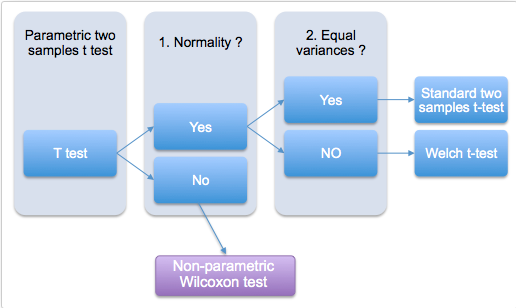

## Tableau des corrélations

In [39]:
dataScoreCorrelation = dataTrain.loc[:, 'nutriscore_score':'sodium_100g']

dataScoreCorrelation.loc[:, "energy_100g":"sodium_100g"]=scaler.transform(dataScoreCorrelation.loc[:, "energy_100g":"sodium_100g"])


n=7
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(st.pearsonr(
            dataScoreCorrelation.iloc[:, i], dataScoreCorrelation.iloc[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=["nutriscore_score","energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"],\
                             index=["nutriscore_score","energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"])

tabCorrelation

,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
nutriscore_score,1.00,0.53,0.60,0.47,-0.17,0.04,0.11
energy_100g,0.53,1.00,0.58,0.31,0.28,0.31,-0.01
saturated_fat_100g,0.60,0.58,1.00,0.14,0.01,0.14,0.00
sugars_100g,0.47,0.31,0.14,1.00,0.01,-0.22,-0.06
fiber_100g,-0.17,0.28,0.01,0.01,1.00,0.22,-0.01
proteins_100g,0.04,0.31,0.14,-0.22,0.22,1.00,0.06
sodium_100g,0.11,-0.01,0.00,-0.06,-0.01,0.06,1.00


## ACP

In [40]:
def interval(l, n):
    w = (l[1] - l[0]) / n
    return [[int(l[0]+i*w), int(l[0]+(i+1)*w)] for i in range(n)]

In [41]:
nbPatrtiion = 4
nutriInterval = [-15.,40.]
nutriInterval

Partition = interval(nutriInterval, nbPatrtiion)
Partition

[[-15, -1], [-1, 12], [12, 26], [26, 40]]

In [42]:
"{:03d}".format(1)

'001'

In [43]:

def nutriPartition(row):
    for idx, part in enumerate(Partition):
        if  part[0] <= row <= part[1] :
            returnedRow =idx#"{} : [{}, {}]".format(idx, int(part[0]) ,int(part[1]) )  #[int(part[0]) ,int(part[1])][int(part[0]) ,int(part[1])]# "[{}, {}]".format(int(part[0]) ,int(part[1]) )  #[int(part[0]) ,int(part[1])]  #    
    return returnedRow


In [44]:
nutriPartition(5)

1

In [45]:
nutriColor=[]

In [46]:
nutriColor

[]

In [47]:
dataTrainScaled["nutriscore_score"].values.tolist().count(np.nan)

0

In [48]:
for idx,row in enumerate(dataTrainScaled["nutriscore_score"].values) : 
    nutriColor.append(nutriPartition(row))

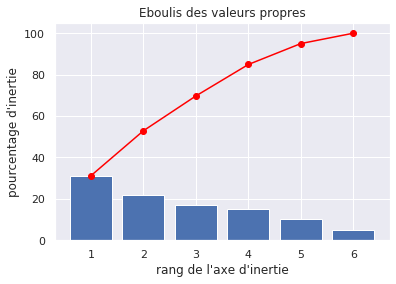

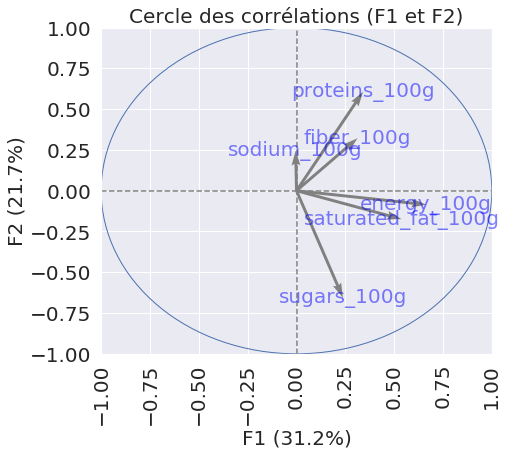

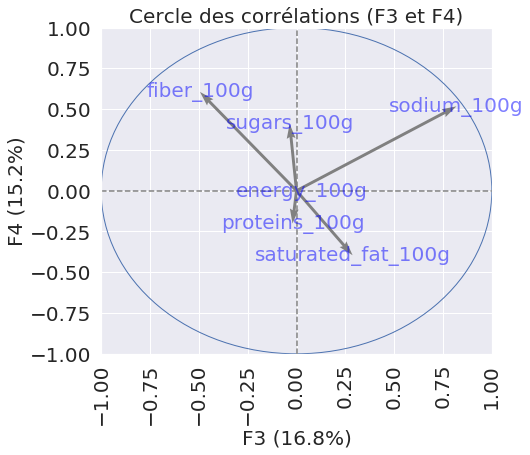

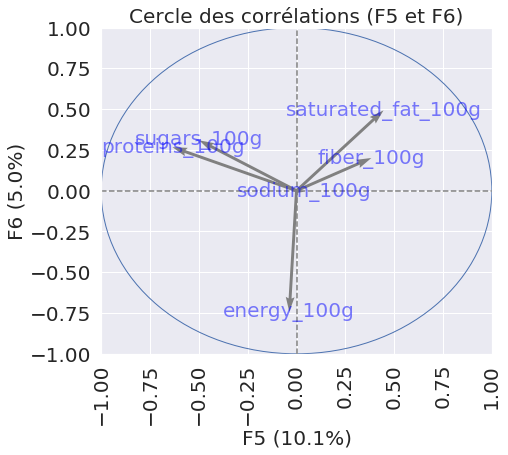

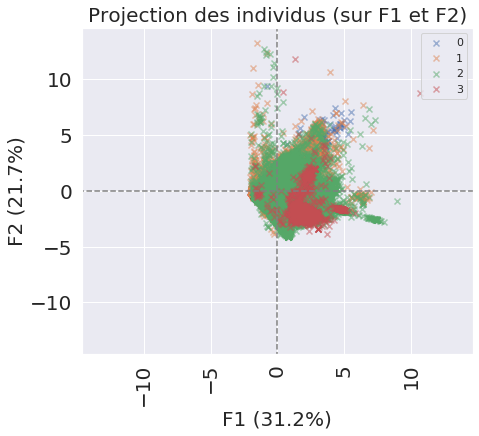

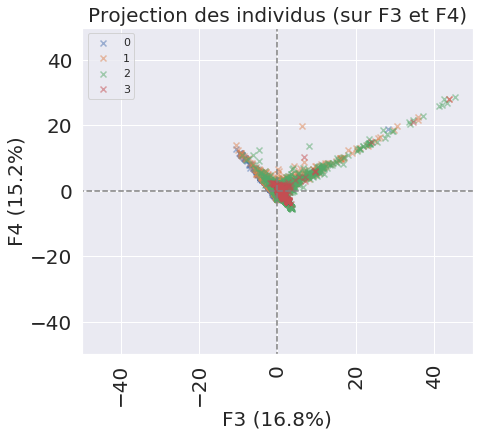

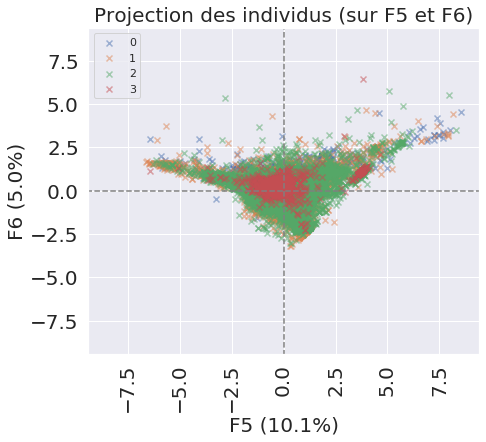

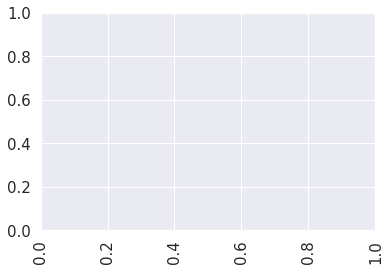

In [49]:

# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = dataTrainScaled[["energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]]

# nutriColor=dataTrainScaled[["nutriscore_score"]].values

# préparation des données pour l'ACP
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
# data_pca = dataTrain.fillna(data_pca.mean())
X_scaled = data_pca.values
names = dataTrainScaled["product_name"]  # ou data.index pour avoir les intitulés
features = dataTrainScaled.loc[:,"energy_100g":"sodium_100g"].columns
# Centrage et Réduction
# std_scale = preprocessing.StandardScaler().fit(X)
# X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [
                         (0, 1), (2, 3), (4, 5)], illustrative_var = nutriColor, alpha = 0.5)

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [50]:

nutriment = pd.DataFrame(np.array([["Lipides",37,9.0 ],["Éthanol (alcool)",29,7.0  ],["Protéines",17,4.0         ],["Glucides",17,4.0          ],["Acide organique",13,3.0   ],["Polyols",10,2.4           ],["Fibres",8,1.9             ]]) ,
                   columns=["nutriments", "kJ/g","kcal/g"]
                            )
nutriment = nutriment.drop(columns="kJ/g")
nutriment.index = nutriment["nutriments"].values
nutriment = nutriment.drop(columns="nutriments")
nutriment

,kcal/g
Lipides,9.0
Éthanol (alcool),7.0
Protéines,4.0
Glucides,4.0
Acide organique,3.0
Polyols,2.4
Fibres,1.9


In [51]:
pca

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pcs

array([[ 0.66364492,  0.53800008,  0.23761442,  0.31242867,  0.34064817,
        -0.00422722],
       [-0.08530227, -0.17411754, -0.65612936,  0.32176456,  0.60678443,
         0.24531834],
       [ 0.02824863,  0.28722564, -0.03515766, -0.49437279, -0.02055638,
         0.81892635],
       [-0.00481171, -0.39561535,  0.41009581,  0.60597294, -0.201225  ,
         0.51729302],
       [-0.03696211,  0.44548876, -0.49819713,  0.38337445, -0.63518971,
         0.03913122],
       [-0.74169509,  0.49271562,  0.30889907,  0.20067951,  0.26719178,
        -0.00611231]])

In [53]:
X_projected.size/6

104516.0

In [54]:
dataTrainProj = dataScaled[["energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]].copy()

In [55]:
dataTrainProj

,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,0.585365,-0.198033,0.138163,-0.086455,-0.000366,0.090800
1,-0.234327,-0.319826,0.543014,-0.640046,-0.330399,0.811190
2,-1.332430,-0.624309,-0.706238,-0.273481,-0.929348,0.238215
3,-1.121356,-0.485908,-0.555865,-0.294556,-0.709326,0.033216
4,-0.015666,-0.611853,2.363743,0.355579,-0.822554,-0.231670
...,...,...,...,...,...,...
864416,0.455872,-0.624309,-0.729373,-0.348683,-0.098154,-0.231670
864417,0.568531,-0.444387,2.393757,0.280110,-0.183718,-0.227064
864418,0.357457,0.206099,-0.127881,0.052777,-0.049260,0.021699
864419,-0.248571,0.040017,0.658685,-0.559432,-0.635985,-0.167176


## Classification et taille de test 

In [56]:
# D = np.array([[1, 335, 1, 4.5, 90],
#               [2, 670, 2, 9, 180],
#               [3, 1005, 3, 13.5, 270],
#               [4, 1340, 4, 18, 360],
#               [5, 1675, 5, 22.5, 450],
#               [6, 2010, 6, 27, 540],
#               [7, 2345, 7, 31, 630],
#               [8, 2680, 8, 36, 720],
#               [9, 3015, 9, 40, 810],
#               [10, 3350, 10, 45, 900]])

D = np.array([[3, 1005, 3, 13.5, 270/1000],
              [7, 2345, 7, 31, 630/1000]])


D = D.transpose()
NEGA_SCORE = pd.DataFrame({"Points": D[0],
                           "energy_100g": D[1],
                           "saturated_fat_100g": D[2],
                           "sugars_100g": D[3],
                           "sodium_100g": D[4]
                           })


# E = np.array([[1, 40, 0.9, 1.6],
#               [2, 60, 1.9, 3.2],
#               [3, 67, 2.8, 4.8],
#               [4, 74, 3.7, 6.4],
#               [5, 80, 4.7, 8.0]])


E = np.array([[2, 60, 1.9, 3.],
#               [3, 67, 2.8, 4.8],
              [4, 74, 3.7, 6.4]])
E = E.transpose()
POSI_SCORE = pd.DataFrame({"Points": E[0],
                           "fruits-vegetables-nuts_100g": E[1],
                           "fiber_100g": E[2],
                           "proteins_100g": E[3]
                           })


In [57]:
print(NEGA_SCORE.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Points &  energy\_100g &  saturated\_fat\_100g &  sugars\_100g &  sodium\_100g \\
\midrule
0 &     3.0 &       1005.0 &                 3.0 &         13.5 &         0.27 \\
1 &     7.0 &       2345.0 &                 7.0 &         31.0 &         0.63 \\
\bottomrule
\end{tabular}



In [58]:
print(POSI_SCORE.drop(columns="fruits-vegetables-nuts_100g").to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Points &  fiber\_100g &  proteins\_100g \\
\midrule
0 &     2.0 &         1.9 &            3.0 \\
1 &     4.0 &         3.7 &            6.4 \\
\bottomrule
\end{tabular}



In [59]:
NEGA_SCORE

,Points,energy_100g,saturated_fat_100g,sugars_100g,sodium_100g
0,3.0,1005.0,3.0,13.5,0.27
1,7.0,2345.0,7.0,31.0,0.63


In [60]:
POSI_SCORE

,Points,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g
0,2.0,60.0,1.9,3.0
1,4.0,74.0,3.7,6.4


In [61]:

POSIdoc = pd.read_csv("ansesNutriPosi.csv", sep='\*')
NEGAdoc = pd.read_csv("ansesNutri.csv", sep='\*')



/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [62]:
POSIdoc

,Points,Fruits Légumes / Fruits à coque (%),Fibres (g/100g) (teneur calculée avec AOAC),Protéines g/100g)
0,0,≤40,"≤0,9","≤1,6"
1,1,>40,">0,9",">1,6"
2,2,>60,">1,9",">3,2"
3,3,-,">2,8",">4,8"
4,4,-,">3,7",">6,4"
5,5,>80,">4,7",">8,0"


In [63]:
NEGAdoc

,Points,Valeur énergétique (kJ/100g),Acides gras saturés (g/100g),Sucres (g/100g),Sodium (mg/100g)
0,0,≤335,≤1,"≤4,5",≤90
1,1,>335,>1,">4,5",>90
2,2,>670,>2,>9,>180
3,3,>1005,>3,">13,5",>270
4,4,>1340,>4,>18,>360
5,5,>1675,>5,">22,5",>450
6,6,>2010,>6,>27,>540
7,7,>2345,>7,>31,>630
8,8,>2680,>8,>36,>720
9,9,>3015,>9,>40,>810


In [64]:

print(POSIdoc.to_latex())

\begin{tabular}{lrlll}
\toprule
{} &  Points         &   Fruits Légumes / Fruits à coque (\%)  &  Fibres (g/100g) (teneur calculée avec AOAC)   &     Protéines g/100g) \\
\midrule
0 &               0 &               ≤40                      &                    ≤0,9                        &                  ≤1,6 \\
1 &               1 &               >40                      &                    >0,9                        &                  >1,6 \\
2 &               2 &               >60                      &                    >1,9                        &                  >3,2 \\
3 &               3 &               -                        &                    >2,8                        &                  >4,8 \\
4 &               4 &               -                        &                    >3,7                        &                  >6,4 \\
5 &               5 &               >80                      &                    >4,7                        &                  >8,0 \

In [65]:
E

array([[ 2. ,  4. ],
       [60. , 74. ],
       [ 1.9,  3.7],
       [ 3. ,  6.4]])

In [66]:
def classByDocNutri(row):
    score = 0
    score_col = 0
    rowNutri = row.copy()

    for col in ["energy_100g", "saturated_fat_100g", "sugars_100g", "sodium_100g"]:
        for idx, val in enumerate(NEGA_SCORE[col]):
#             print("col , val ",col , val)
            if row[col] > val:
                score_col = NEGA_SCORE["Points"][idx]
        rowNutri[col] = str(int(score_col))
#         print( rowNutri[col])
#         rowNutri.loc[:,col] = score_col
    
    score_col = 0
    
    columns = ["fiber_100g", "proteins_100g"]

    for col in columns:
        for idx, val in enumerate(POSI_SCORE[col]):
#             print("col , val ",col , val)
            if row[col] > val:
                score_col = POSI_SCORE["Points"][idx]
        rowNutri[col] = str(int(score_col))
    return rowNutri

In [67]:
dataScore = dataTrain.apply(classByDocNutri, axis=1)

In [68]:
dataScore

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,moutarde au moût de raisin,18.0,0,0,3,0,2,7,31.111024
1,Tarte noix de coco,14.0,3,7,3,4,2,3,46.440000
2,Compote de poire,-2.0,0,0,3,2,2,3,31.200000
3,BAguette bressan,-4.0,0,0,0,0,4,0,12.343200
4,Cranberries,3.0,3,3,7,4,4,7,76.670000
...,...,...,...,...,...,...,...,...,...
104511,fibre 5 fruits secs,10.0,3,3,3,4,4,3,40.128000
104512,Noisettes,-4.0,7,3,3,4,4,3,33.450000
104513,Deli'light fromage blanc saveur vanille 0%,-2.0,0,0,0,0,4,0,18.840000
104514,Spécial k test pau,-6.0,0,0,0,4,4,3,18.600000


In [69]:
dataScore.to_csv('dataScore.csv', sep='\t', encoding='utf-8')

Taille test pour Khi2 / ANOVA / T-Test

In [70]:
# taille_test = min(100000, dataScore.shape[0])
taille_test=dataScore.shape[0]
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)
dataScoreTest = dataScore.loc[sample, :]
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

taille test 104516


## Khi2

In [71]:
X = "energy_100g"
Y = "proteins_100g"

cont = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

proteins_100g,0,2,4,Total
energy_100g,,,,
0,19414,16213,14999,50626
3,3894,11865,31728,47487
7,1500,611,4292,6403
Total,24808,28689,51019,104516


In [72]:
print(cont.to_latex())

\begin{tabular}{lrrrr}
\toprule
proteins\_100g &      0 &      2 &      4 &   Total \\
energy\_100g &        &        &        &         \\
\midrule
0           &  19414 &  16213 &  14999 &   50626 \\
3           &   3894 &  11865 &  31728 &   47487 \\
7           &   1500 &    611 &   4292 &    6403 \\
Total       &  24808 &  28689 &  51019 &  104516 \\
\bottomrule
\end{tabular}



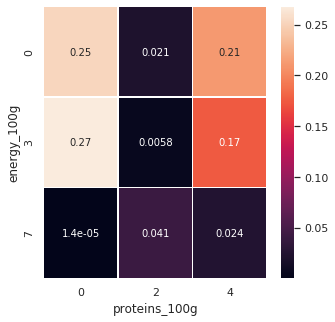

<Figure size 432x288 with 0 Axes>

proteins_100g,0,2,4
energy_100g,,,
0,0.252606,0.021420,0.211803
3,0.267863,0.005824,0.174832
7,0.000014,0.041492,0.024146


In [73]:

fig, ax = plt.subplots(figsize=(5,5))    


tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dataScoreTest)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n


fig = plt.figure(figsize=(6, 4))

ax = sns.heatmap(table.iloc[:-1,:-1],annot=True, linewidths=.5, ax=ax)

plt.show()
table.iloc[:-1,:-1]

Ce tableaux de contributions indiquent que les aliments dont l'énergie est comprise entre 1005 et 2345 kj/100g et un taux de protéine > 6.4 % sont le moins indépendant.           
              


In [74]:
from scipy.stats import chi2_contingency
obs = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
obs

proteins_100g,0,2,4
energy_100g,,,
0,19414,16213,14999
3,3894,11865,31728
7,1500,611,4292


In [75]:
chi2_contingency(obs)

(18027.204154956507,
 0.0,
 4,
 array([[12016.62719584, 13896.52602472, 24712.84677944],
        [11271.55168587, 13034.88980635, 23180.55850779],
        [ 1519.8211183 ,  1757.58416893,  3125.59471277]]))

La p-valeur = 0.0 : nous pouvons rejeter l'hypothèse que les variables energy et proteins sont indépendantes

## ANOVA

In [76]:
rp.summary_cont(dataScoreTest['nutriscore_score'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,nutriscore_score,104516.0,7.240528,8.871951,0.027443,7.18674,7.294315


In [77]:
pd.options.display.max_rows = 999

In [78]:
rp.summary_cont(dataScoreTest.groupby(['energy_100g',"saturated_fat_100g"]))['nutriscore_score']

N       Mean        SD        SE  \
energy_100g saturated_fat_100g                                         
0           0                   43641   2.138402  6.106134  0.029229   
            3                    5467   7.113042  4.746330  0.064192   
            7                    1518  12.654809  3.731171  0.095766   
3           3                   30685   6.593971  7.745816  0.044219   
            7                   16802  19.094096  4.523877  0.034900   
7           3                    1981   5.523978  7.623863  0.171290   
            7                    4422  16.109000  7.480404  0.112490   

                                95% Conf.   Interval  
energy_100g saturated_fat_100g                        
0           0                    2.081112   2.195691  
            3                    6.987225   7.238859  
            7                   12.467109  12.842509  
3           3                    6.507303   6.680639  
            7                   19.025691  19.162501  
7           3                    5.188249   5.859707  
            7                   15.888519  16.329482

In [79]:

rp.summary_cont(dataScoreTest.groupby(['sugars_100g',"sodium_100g"]))['nutriscore_score']

N       Mean        SD        SE  95% Conf.  \
sugars_100g sodium_100g                                                    
0           0            22629   0.909452  6.376370  0.042388   0.826372   
            3            11749   0.642863  3.033962  0.027990   0.588002   
            7             4109   8.255050  4.192389  0.065402   8.126861   
3           3            33599   5.665526  7.930796  0.043267   5.580723   
            7             6514  13.502610  4.106566  0.050881  13.402883   
7           3             5508  16.348039  5.204791  0.070130  16.210584   
            7            20408  15.990837  6.905041  0.048335  15.896099   

                          Interval  
sugars_100g sodium_100g             
0           0             0.992533  
            3             0.697724  
            7             8.383239  
3           3             5.750328  
            7            13.602336  
7           3            16.485495  
            7            16.085574

In [80]:
rp.summary_cont(dataScoreTest.groupby(["energy_100g","sodium_100g"]))['nutriscore_score']

N       Mean        SD        SE  95% Conf.  \
energy_100g sodium_100g                                                    
0           0            22629   0.909452  6.376370  0.042388   0.826372   
            3            20215   2.662231  4.783518  0.033644   2.596288   
            7             7782   9.897456  4.859816  0.055090   9.789479   
3           3            27542   7.463401  9.119766  0.054952   7.355695   
            7            19945  15.923690  6.183936  0.043787  15.837867   
7           3             3099   9.222330  8.650144  0.155386   8.917773   
            7             3304  16.221852  7.889649  0.137258  15.952827   

                          Interval  
energy_100g sodium_100g             
0           0             0.992533  
            3             2.728174  
            7            10.005432  
3           3             7.571108  
            7            16.009513  
7           3             9.526887  
            7            16.490878

### Double ANOVA sugars et fiber

In [81]:
grouped = dataScoreTest.groupby(["sugars_100g","fiber_100g"])
rp.summary_cont(grouped)['nutriscore_score']

N       Mean        SD        SE  95% Conf.  \
sugars_100g fiber_100g                                                    
0           0           26673   3.238218  5.464521  0.033459   3.172638   
            2            7327  -1.185478  4.710061  0.055025  -1.293328   
            4            4487  -3.484288  4.733058  0.070658  -3.622778   
3           0           15537   9.828667  7.140635  0.057287   9.716385   
            2            9700   6.639897  8.229723  0.083560   6.476119   
            4           14876   4.113807  7.602681  0.062334   3.991633   
7           0           14523  16.950286  5.720936  0.047472  16.857240   
            2            4954  18.238595  6.140129  0.087237  18.067611   
            4            6439  12.403013  7.262585  0.090507  12.225619   

                         Interval  
sugars_100g fiber_100g             
0           0            3.303799  
            2           -1.077629  
            4           -3.345797  
3           0            9.940949  
            2            6.803675  
            4            4.235982  
7           0           17.043331  
            2           18.409579  
            4           12.580407

In [82]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


('0', '0') p = 0  : The null hypothesis can be rejected
('0', '2') p = 1.25149e-98  : The null hypothesis can be rejected
('0', '4') p = 2.01284e-81  : The null hypothesis can be rejected
('3', '0') p = 0  : The null hypothesis can be rejected
('3', '2') p = 0  : The null hypothesis can be rejected
('3', '4') p = 0  : The null hypothesis can be rejected
('7', '0') p = 1.58322e-111  : The null hypothesis can be rejected
('7', '2') p = 1.50263e-80  : The null hypothesis can be rejected
('7', '4') p = 0  : The null hypothesis can be rejected


In [83]:
model = ols('nutriscore_score ~ C(sugars_100g)*C(fiber_100g)', dataScoreTest).fit()

In [84]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(sugars_100g),3.525843e+06,2.0,42160.471176,0.0
C(fiber_100g),5.357415e+05,2.0,6406.158776,0.0
C(sugars_100g):C(fiber_100g),7.915053e+04,4.0,473.223463,0.0
Residual,4.369915e+06,104507.0,NaN,NaN


In [85]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(sugars_100g),3.525843e+06,1.762922e+06,2.0,42160.471176,0.0,0.414286,0.414274
C(fiber_100g),5.357415e+05,2.678707e+05,2.0,6406.158776,0.0,0.062950,0.062939
C(sugars_100g):C(fiber_100g),7.915053e+04,1.978763e+04,4.0,473.223463,0.0,0.009300,0.009280
Residual,4.369915e+06,4.181456e+01,104507.0,NaN,NaN,NaN,NaN


In [86]:
print(res.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &        sum\_sq &        df &             F &  PR(>F) &       mean\_sq &    eta\_sq &  omega\_sq \\
\midrule
C(sugars\_100g)               &  3.525843e+06 &       2.0 &  42160.471176 &     0.0 &  1.762922e+06 &  0.414286 &  0.414274 \\
C(fiber\_100g)                &  5.357415e+05 &       2.0 &   6406.158776 &     0.0 &  2.678707e+05 &  0.062950 &  0.062939 \\
C(sugars\_100g):C(fiber\_100g) &  7.915053e+04 &       4.0 &    473.223463 &     0.0 &  1.978763e+04 &  0.009300 &  0.009280 \\
Residual                     &  4.369915e+06 &  104507.0 &           NaN &     NaN &  4.181456e+01 &       NaN &       NaN \\
\bottomrule
\end{tabular}



In [87]:
"nutriscore_score	energy_100g	saturated_fat_100g	sugars_100g	fiber_100g	proteins_100g	sodium_100g"

'nutriscore_score\tenergy_100g\tsaturated_fat_100g\tsugars_100g\tfiber_100g\tproteins_100g\tsodium_100g'

### Double ANOVA "energy_100g","proteins_100g"

In [88]:
grouped = dataScoreTest.groupby(["energy_100g","proteins_100g"])
rp.summary_cont(grouped)['nutriscore_score']

N       Mean        SD        SE  95% Conf.  \
energy_100g proteins_100g                                                    
0           0              19414   5.265736  6.313673  0.045313   5.176922   
            2              16213   0.673287  5.519722  0.043350   0.588322   
            4              14999   2.551770  6.216080  0.050756   2.452289   
3           0               3894  14.535696  4.885920  0.078298  14.382233   
            2              11865  15.923388  6.693017  0.061445  15.802956   
            4              31728   8.750063  9.326914  0.052362   8.647433   
7           0               1500  16.542667  6.663466  0.172050  16.205449   
            2                611  20.198036  5.943868  0.240463  19.726728   
            4               4292  10.489748  9.035167  0.137913  10.219438   

                            Interval  
energy_100g proteins_100g             
0           0               5.354550  
            2               0.758252  
            4               2.651251  
3           0              14.689159  
            2              16.043821  
            4               8.852693  
7           0              16.879885  
            2              20.669344  
            4              10.760059

In [89]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")

('0', '0') p = 1.22623e-167  : The null hypothesis can be rejected
('0', '2') p = 7.35743e-230  : The null hypothesis can be rejected
('0', '4') p = 1.98786e-138  : The null hypothesis can be rejected
('3', '0') p = 1.81937e-11  : The null hypothesis can be rejected
('3', '2') p = 1.07078e-92  : The null hypothesis can be rejected
('3', '4') p = 0  : The null hypothesis can be rejected
('7', '0') p = 1.40824e-68  : The null hypothesis can be rejected
('7', '2') p = 2.82348e-16  : The null hypothesis can be rejected
('7', '4') p = 1.52791e-234  : The null hypothesis can be rejected


In [90]:
model = ols('nutriscore_score ~ C(energy_100g)*C(proteins_100g)', dataScoreTest).fit()
res = sm.stats.anova_lm(model, typ= 2)
res


,sum_sq,df,F,PR(>F)
C(energy_100g),2.192889e+06,2.0,20208.908220,0.0
C(proteins_100g),4.038723e+05,2.0,3721.947837,0.0
C(energy_100g):C(proteins_100g),3.608072e+05,4.0,1662.537437,0.0
Residual,5.670080e+06,104507.0,NaN,NaN


In [91]:
anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(energy_100g),2.192889e+06,1.096444e+06,2.0,20208.908220,0.0,0.254170,0.254156
C(proteins_100g),4.038723e+05,2.019361e+05,2.0,3721.947837,0.0,0.046811,0.046799
C(energy_100g):C(proteins_100g),3.608072e+05,9.020180e+04,4.0,1662.537437,0.0,0.041820,0.041794
Residual,5.670080e+06,5.425550e+01,104507.0,NaN,NaN,NaN,NaN


In [92]:
"nutriscore_score	energy_100g	saturated_fat_100g	sugars_100g	fiber_100g	proteins_100g	sodium_100g"

'nutriscore_score\tenergy_100g\tsaturated_fat_100g\tsugars_100g\tfiber_100g\tproteins_100g\tsodium_100g'

### Double ANOVA "proteins_100g","sodium_100g"

In [93]:
grouped = dataScoreTest.groupby(["proteins_100g","sodium_100g"])
rp.summary_cont(grouped)['nutriscore_score']

N       Mean        SD        SE  95% Conf.  \
proteins_100g sodium_100g                                                    
0             0            11784   4.312033  6.307582  0.058105   4.198147   
              3             6381   6.565115  7.037876  0.088104   6.392431   
              7             6643  13.689598  5.220549  0.064052  13.564056   
2             0             7393  -2.445692  4.103116  0.047720  -2.539224   
              3            13759   7.881459  8.316469  0.070900   7.742496   
              7             7537  16.163991  6.986730  0.080478  16.006255   
4             0             3452  -3.520278  3.378027  0.057495  -3.632968   
              3            30716   4.480434  7.889992  0.045019   4.392197   
              7            16851  13.972405  6.839891  0.052691  13.869131   

                            Interval  
proteins_100g sodium_100g             
0             0             4.425920  
              3             6.737800  
              7            13.815140  
2             0            -2.352160  
              3             8.020423  
              7            16.321727  
4             0            -3.407589  
              3             4.568671  
              7            14.075680

In [94]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")

('0', '0') p = 7.11125e-305  : The null hypothesis can be rejected
('0', '3') p = 3.16171e-112  : The null hypothesis can be rejected
('0', '7') p = 1.21496e-57  : The null hypothesis can be rejected
('2', '0') p = 3.11213e-164  : The null hypothesis can be rejected
('2', '3') p = 0  : The null hypothesis can be rejected
('2', '7') p = 3.75735e-114  : The null hypothesis can be rejected
('4', '0') p = 1.1514e-120  : The null hypothesis can be rejected
('4', '3') p = 0  : The null hypothesis can be rejected
('4', '7') p = 3.57558e-101  : The null hypothesis can be rejected


In [95]:
model = ols('nutriscore_score ~ C(proteins_100g)*C(sodium_100g)', dataScoreTest).fit()
res = sm.stats.anova_lm(model, typ= 2)
res


,sum_sq,df,F,PR(>F)
C(proteins_100g),1.774114e+05,2.0,1800.261236,0.0
C(sodium_100g),2.818652e+06,2.0,28601.937634,0.0
C(proteins_100g):C(sodium_100g),2.556679e+05,4.0,1297.179702,0.0
Residual,5.149456e+06,104507.0,NaN,NaN


In [96]:
anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(proteins_100g),1.774114e+05,8.870570e+04,2.0,1800.261236,0.0,0.021117,0.021106
C(sodium_100g),2.818652e+06,1.409326e+06,2.0,28601.937634,0.0,0.335506,0.335493
C(proteins_100g):C(sodium_100g),2.556679e+05,6.391696e+04,4.0,1297.179702,0.0,0.030432,0.030409
Residual,5.149456e+06,4.927379e+01,104507.0,NaN,NaN,NaN,NaN


In [97]:
"nutriscore_score	energy_100g	saturated_fat_100g	sugars_100g	fiber_100g	proteins_100g	sodium_100g"

'nutriscore_score\tenergy_100g\tsaturated_fat_100g\tsugars_100g\tfiber_100g\tproteins_100g\tsodium_100g'

### Double ANOVA saturated_fat et fiber

In [98]:
grouped = dataScoreTest.groupby(["saturated_fat_100g","fiber_100g"])
rp.summary_cont(grouped)['nutriscore_score']


N       Mean        SD        SE  \
saturated_fat_100g fiber_100g                                         
0                  0           30785   3.729966  5.778095  0.032932   
                   2            8022  -0.778110  5.000524  0.055831   
                   4            4834  -3.157427  4.919993  0.070764   
3                  0           13589  10.534182  6.119886  0.052499   
                   2            9191   6.062017  7.347630  0.076642   
                   4           15353   3.471699  6.822720  0.055063   
7                  0           12359  18.389352  5.433114  0.048872   
                   2            4768  20.260277  4.477152  0.064839   
                   4            5615  15.563313  5.530645  0.073808   

                               95% Conf.   Interval  
saturated_fat_100g fiber_100g                        
0                  0            3.665420   3.794512  
                   2           -0.887539  -0.668682  
                   4           -3.296124  -3.018730  
3                  0           10.431284  10.637080  
                   2            5.911799   6.212235  
                   4            3.363776   3.579623  
7                  0           18.293563  18.485140  
                   2           20.133193  20.387361  
                   4           15.418650  15.707975

In [99]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")

('0', '0') p = 0  : The null hypothesis can be rejected
('0', '2') p = 1.96768e-129  : The null hypothesis can be rejected
('0', '4') p = 9.34333e-94  : The null hypothesis can be rejected
('3', '0') p = 7.12194e-301  : The null hypothesis can be rejected
('3', '2') p = 0  : The null hypothesis can be rejected
('3', '4') p = 0  : The null hypothesis can be rejected
('7', '0') p = 5.84324e-61  : The null hypothesis can be rejected
('7', '2') p = 1.9254e-234  : The null hypothesis can be rejected
('7', '4') p = 2.98008e-164  : The null hypothesis can be rejected


In [100]:
model = ols('nutriscore_score ~ C(saturated_fat_100g)*C(fiber_100g)', dataScoreTest).fit()
res = sm.stats.anova_lm(model, typ= 2)
res


,sum_sq,df,F,PR(>F)
C(saturated_fat_100g),4.152496e+06,2.0,58690.283007,0.0
C(fiber_100g),5.790945e+05,2.0,8184.769024,0.0
C(saturated_fat_100g):C(fiber_100g),1.253366e+05,4.0,885.737174,0.0
Residual,3.697076e+06,104507.0,NaN,NaN


In [101]:
anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(saturated_fat_100g),4.152496e+06,2.076248e+06,2.0,58690.283007,0.0,0.485445,0.485434
C(fiber_100g),5.790945e+05,2.895472e+05,2.0,8184.769024,0.0,0.067699,0.067690
C(saturated_fat_100g):C(fiber_100g),1.253366e+05,3.133415e+04,4.0,885.737174,0.0,0.014652,0.014636
Residual,3.697076e+06,3.537635e+01,104507.0,NaN,NaN,NaN,NaN


In [102]:
"nutriscore_score	energy_100g	saturated_fat_100g	sugars_100g	fiber_100g	proteins_100g	sodium_100g"

'nutriscore_score\tenergy_100g\tsaturated_fat_100g\tsugars_100g\tfiber_100g\tproteins_100g\tsodium_100g'

## T-Test : test d'indépendance de Student 

In [103]:
rp.summary_cont(dataScoreTest.groupby(['energy_100g']))['nutriscore_score']


,N,Mean,SD,SE,95% Conf.,Interval
energy_100g,,,,,,
0,50626,2.990934,6.344430,0.028197,2.935667,3.046200
3,47487,11.016805,9.040730,0.041487,10.935489,11.098120
7,6403,12.834140,8.975598,0.112169,12.614290,13.053991


In [104]:
dataScoreTest

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
69104,Moutarde de dijon,9.0,0,0,0,2,4,7,17.380000
64565,Yaourt au lait entier nature,1.0,0,0,0,0,2,0,10.740000
85262,PAN INTEGRAL BIMBO,-2.0,3,3,3,4,4,3,25.019000
51021,Canistrelli aux amandes,6.0,3,3,3,4,4,3,38.000000
18905,Organic Red Kidney Beans,-6.0,0,0,0,4,2,0,13.221600
...,...,...,...,...,...,...,...,...,...
39932,Soufflés à base de maïs goût oignon,10.0,3,3,3,4,4,3,18.360000
18169,Cheese Enchilada Dinner,1.0,0,0,0,2,2,3,8.515816
37908,Sauce salsa forte,7.0,0,0,0,0,0,7,9.780000
79136,Petits Pois Carottes,-9.0,0,0,0,4,2,0,11.728000


In [105]:

A = dataScoreTest.loc[dataScoreTest['energy_100g'] == "0"]["nutriscore_score"]
B = dataScoreTest.loc[dataScoreTest['energy_100g'] == "3"]["nutriscore_score"]
A

69104     9.0
64565     1.0
18905    -6.0
82527     2.0
55971    11.0
         ... 
29712     4.0
39462    -4.0
18169     1.0
37908     7.0
79136    -9.0
Name: nutriscore_score, Length: 50626, dtype: float64

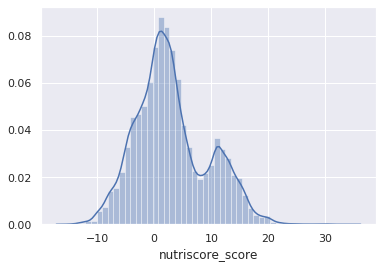

p = 0
The null hypothesis can be rejected


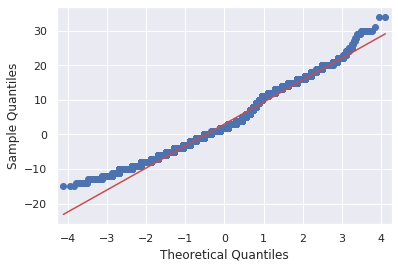

In [106]:
variable = A

sns.distplot(variable, kde=True)

plt.show()

k2, p = stats.normaltest(variable)

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(variable, line="s")
plt.show()

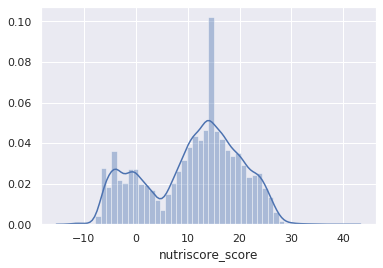

p = 0
The null hypothesis can be rejected


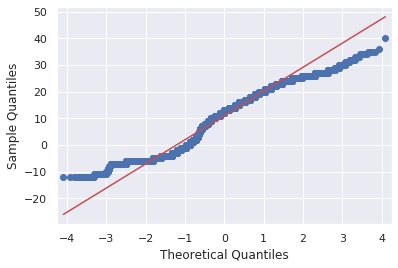

In [107]:
variable = B

sns.distplot(variable, kde=True)

plt.show()

k2, p = stats.normaltest(variable)

alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


sm.qqplot(variable, line="s")
plt.show()

In [108]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=-161.74749311709974, pvalue=0.0)

On rejette l'hypothèse que le la valeur élergétique n'a pas d'influmence sur le nutriscore

In [109]:
stats.mannwhitneyu(A,B)

MannwhitneyuResult(statistic=598319590.5, pvalue=0.0)

## Influence de la taille de l'échantillon sur les tests Khi2 / ANOVA / T-Test

In [110]:
EchTest = pd.DataFrame(np.nan, index=["Khi2", "ANOVA", "TTest"], columns=["1000", "10000","100000" ])
classTest = pd.DataFrame(np.nan, index=["Khi2", "ANOVA", "TTest"], columns=["3*3", "10*6" ])

### Influence sur le Khi2

#### taille test = 1000

In [111]:
taille_test = min(1000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

X = "energy_100g"
Y = "proteins_100g"

cont = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

from scipy.stats import chi2_contingency
obs = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

chi2_contingency(obs)

print("la p-valeur du test de khi2 est de ", chi2_contingency(obs)[1])

EchTest.loc["Khi2","1000"] = chi2_contingency(obs)[1]


taille test 1000
la p-valeur du test de khi2 est de  4.74048760711518e-28


#### taille test = 10000

In [112]:
taille_test = min(10000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

X = "energy_100g"
Y = "proteins_100g"

cont = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

from scipy.stats import chi2_contingency
obs = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

chi2_contingency(obs)

print("la p-valeur du test de khi2 est de ", chi2_contingency(obs)[1])

EchTest.loc["Khi2","10000"] = chi2_contingency(obs)[1]


taille test 10000
la p-valeur du test de khi2 est de  0.0


#### taille test = 100000

In [113]:
taille_test = min(100000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

X = "energy_100g"
Y = "proteins_100g"

cont = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

from scipy.stats import chi2_contingency
obs = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)

chi2_contingency(obs)

print("la p-valeur du test de khi2 est de ", chi2_contingency(obs)[1])

EchTest.loc["Khi2","100000"] = chi2_contingency(obs)[1]

classTest.loc["Khi2","3*3"] = chi2_contingency(obs)[1]

taille test 100000
la p-valeur du test de khi2 est de  0.0


### Influence sur ANOVA sugars

#### taille test = 1000

In [114]:
taille_test = min(1000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})


taille test 1000


In [115]:
grouped = dataScoreTest.groupby(["sugars_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
sugars_100g,,,,,,
0,355,1.800000,5.609415,0.297717,1.216475,2.383525
3,399,6.764411,8.058494,0.403429,5.973690,7.555133
7,246,16.386179,6.752267,0.430509,15.542382,17.229976


In [116]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


0 p = 3.46366e-05  : The null hypothesis can be rejected
3 p = 1.62646e-17  : The null hypothesis can be rejected
7 p = 0.00126539  : The null hypothesis can be rejected


In [117]:
model = ols('nutriscore_score ~ C(sugars_100g)', dataScoreTest).fit()

In [118]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(sugars_100g),31157.871355,2.0,322.546139,9.415718e-109
Residual,48154.967645,997.0,NaN,NaN


In [119]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(sugars_100g),31157.871355,15578.935678,2.0,322.546139,9.415718e-109,0.392848,0.391391
Residual,48154.967645,48.299867,997.0,NaN,NaN,NaN,NaN


In [120]:
EchTest.loc["ANOVA","1000"] = anova_table(res).loc["C(sugars_100g)","PR(>F)"]
print(anova_table(res).loc["C(sugars_100g)","PR(>F)"])

9.415717992008106e-109


#### taille test = 10000

In [121]:
taille_test = min(10000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})


taille test 10000


In [122]:
grouped = dataScoreTest.groupby(["sugars_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
sugars_100g,,,,,,
0,3738,1.479401,5.781429,0.094562,1.294060,1.664742
3,3817,6.706314,7.948138,0.128648,6.454163,6.958465
7,2445,16.145194,6.580841,0.133089,15.884340,16.406049


In [123]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


0 p = 3.92839e-50  : The null hypothesis can be rejected
3 p = 4.27529e-154  : The null hypothesis can be rejected
7 p = 6.48749e-17  : The null hypothesis can be rejected


In [124]:
model = ols('nutriscore_score ~ C(sugars_100g)', dataScoreTest).fit()

In [125]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(sugars_100g),318702.491374,2.0,3376.359426,0.0
Residual,471820.147726,9997.0,NaN,NaN


In [126]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(sugars_100g),318702.491374,159351.245687,2.0,3376.359426,0.0,0.403154,0.403011
Residual,471820.147726,47.196174,9997.0,NaN,NaN,NaN,NaN


In [127]:
EchTest.loc["ANOVA","10000"] = anova_table(res).loc["C(sugars_100g)","PR(>F)"]
print(anova_table(res).loc["C(sugars_100g)","PR(>F)"])

0.0


#### taille test = 100000

In [128]:
taille_test = min(100000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})


taille test 100000


In [129]:
grouped = dataScoreTest.groupby(["sugars_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
sugars_100g,,,,,,
0,36861,1.608421,5.812335,0.030274,1.549084,1.667757
3,38374,6.936884,7.979865,0.040736,6.857042,7.016727
7,24765,16.074823,6.579166,0.041807,15.992881,16.156766


In [130]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


0 p = 0  : The null hypothesis can be rejected
3 p = 0  : The null hypothesis can be rejected
7 p = 2.64582e-136  : The null hypothesis can be rejected


In [131]:
model = ols('nutriscore_score ~ C(sugars_100g)', dataScoreTest).fit()

In [132]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(sugars_100g),3.105569e+06,2.0,32615.777414,0.0
Residual,4.760695e+06,99997.0,NaN,NaN


In [133]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(sugars_100g),3.105569e+06,1.552784e+06,2.0,32615.777414,0.0,0.394796,0.394781
Residual,4.760695e+06,4.760838e+01,99997.0,NaN,NaN,NaN,NaN


In [134]:
EchTest.loc["ANOVA","100000"] = anova_table(res).loc["C(sugars_100g)","PR(>F)"]
print(anova_table(res).loc["C(sugars_100g)","PR(>F)"])


classTest.loc["ANOVA","3*3"] = anova_table(res).loc["C(sugars_100g)","PR(>F)"]

0.0


### Influence sur le T-Test : test d'indépendance de Student 

#### taille test = 1000

In [135]:
taille_test = min(1000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

taille test 1000


In [136]:
grouped = dataScoreTest.groupby(["energy_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
energy_100g,,,,,,
0,489,2.950920,6.474860,0.292803,2.377026,3.524815
3,464,12.000000,8.847887,0.410753,11.194924,12.805076
7,47,12.531915,9.577717,1.397054,9.793690,15.270140


In [137]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


0 p = 1.56066e-05  : The null hypothesis can be rejected
3 p = 3.56799e-07  : The null hypothesis can be rejected
7 p = 0.0415241  : The null hypothesis can be rejected


In [138]:
A = dataScoreTest.loc[dataScoreTest['energy_100g'] == "0"]["nutriscore_score"]
B = dataScoreTest.loc[dataScoreTest['energy_100g'] == "3"]["nutriscore_score"]

In [139]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=-18.082215793594276, pvalue=4.8111809528617546e-63)

On rejette l'hypothèse que le la valeur élergétique n'a pas d'influmence sur le nutriscore

In [140]:
EchTest.loc["TTest","1000"] = stats.ttest_ind(A,B)[1]


print("la p-valeur du TTest est de ", stats.ttest_ind(A,B)[1])

la p-valeur du TTest est de  4.8111809528617546e-63


#### taille test = 10000

In [141]:
taille_test = min(10000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

taille test 10000


In [142]:
grouped = dataScoreTest.groupby(["energy_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
energy_100g,,,,,,
0,4824,2.984867,6.271352,0.090294,2.807892,3.161843
3,4547,10.967671,8.933423,0.132482,10.708007,11.227335
7,629,12.858506,9.173349,0.365765,12.141605,13.575406


In [143]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


0 p = 4.67725e-37  : The null hypothesis can be rejected
3 p = 1.02487e-112  : The null hypothesis can be rejected
7 p = 5.62963e-26  : The null hypothesis can be rejected


In [144]:
A = dataScoreTest.loc[dataScoreTest['energy_100g'] == "0"]["nutriscore_score"]
B = dataScoreTest.loc[dataScoreTest['energy_100g'] == "3"]["nutriscore_score"]

In [145]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=-50.29380923260203, pvalue=0.0)

On rejette l'hypothèse que le la valeur élergétique n'a pas d'influmence sur le nutriscore

In [146]:
EchTest.loc["TTest","10000"] = stats.ttest_ind(A,B)[1]


print("la p-valeur du TTest est de ", stats.ttest_ind(A,B)[1])

la p-valeur du TTest est de  0.0


#### taille test = 100000

In [147]:
taille_test = min(100000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

taille test 100000


In [148]:
grouped = dataScoreTest.groupby(["energy_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
energy_100g,,,,,,
0,48435,2.993228,6.340160,0.028808,2.936763,3.049693
3,45438,11.015494,9.042464,0.042421,10.932349,11.098638
7,6127,12.847886,8.983264,0.114765,12.622947,13.072826


In [149]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


0 p = 0  : The null hypothesis can be rejected
3 p = 0  : The null hypothesis can be rejected
7 p = 1.11069e-227  : The null hypothesis can be rejected


In [150]:
A = dataScoreTest.loc[dataScoreTest['energy_100g'] == "0"]["nutriscore_score"]
B = dataScoreTest.loc[dataScoreTest['energy_100g'] == "3"]["nutriscore_score"]

In [151]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=-158.15806052945678, pvalue=0.0)

On rejette l'hypothèse que le la valeur élergétique n'a pas d'influmence sur le nutriscore

In [152]:
EchTest.loc["TTest","100000"] = stats.ttest_ind(A,B)[1]


classTest.loc["TTest","3*3"] = stats.ttest_ind(A,B)[1]

print("la p-valeur du TTest est de ", stats.ttest_ind(A,B)[1])

la p-valeur du TTest est de  0.0


### Présentation résultats sur l'influence de la taille de l'échantillon : 

In [153]:
d = {    
    'Test':       ["Khi2", "ANOVA", "TTest",\
                    "Khi2", "ANOVA", "TTest",\
                    "Khi2", "ANOVA", "TTest"],\
    "Echantillon":["1000", "1000","1000", "10000","10000", "10000","100000", "100000","100000"],\
    'Resuts':      [EchTest.loc["Khi2","1000"], EchTest.loc["ANOVA","1000"],EchTest.loc["TTest","1000"],\
                    EchTest.loc["Khi2","10000"], EchTest.loc["ANOVA","10000"],EchTest.loc["TTest","10000"],\
                    EchTest.loc["Khi2","100000"], EchTest.loc["ANOVA","100000"],EchTest.loc["TTest","100000"]]\
                    }


pvalTailleEch= pd.DataFrame(data=d)
pvalTailleEch

,Test,Echantillon,Resuts
0,Khi2,1000,4.740488e-28
1,ANOVA,1000,9.415718e-109
2,TTest,1000,4.811181e-63
3,Khi2,10000,0.000000e+00
4,ANOVA,10000,0.000000e+00
5,TTest,10000,0.000000e+00
6,Khi2,100000,0.000000e+00
7,ANOVA,100000,0.000000e+00
8,TTest,100000,0.000000e+00


In [154]:
# fig = plt.figure(figsize=(15,5))
# plot = fig.add_subplot(1,1,1)
# sns.set(style="whitegrid")
# data = pvalTailleEch
# ax = sns.barplot(x="Echantillon", y="Resuts", hue="Test", data=data)
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)

In [155]:
EchTest

,1000,10000,100000
Khi2,4.740488e-28,0.0,0.0
ANOVA,9.415718e-109,0.0,0.0
TTest,4.811181e-63,0.0,0.0


## Influence de la classification tests Khi2 / ANOVA / T-Test

In [156]:
D = np.array([[1, 335, 1, 4.5, 90],
              [2, 670, 2, 9, 180],
              [3, 1005, 3, 13.5, 270],
              [4, 1340, 4, 18, 360],
              [5, 1675, 5, 22.5, 450],
              [6, 2010, 6, 27, 540],
              [7, 2345, 7, 31, 630],
              [8, 2680, 8, 36, 720],
               [9, 3015, 9, 40, 810]])
#               [10, 3350, 10, 45, 900]])

# D = np.array([[3, 1005, 3, 13.5, 270],
#               [7, 2345, 7, 31, 630]])


D = D.transpose()
NEGA_SCORE = pd.DataFrame({"Points": D[0],
                           "energy_100g": D[1],
                           "saturated_fat_100g": D[2],
                           "sugars_100g": D[3],
                           "sodium_100g": D[4]/1000
                           })


E = np.array([[1, 40, 0.9, 1.6],
              [2, 60, 1.9, 3.2],
              [3, 67, 2.8, 4.8],
              [4, 74, 3.7, 6.4],
              [5, 80, 4.7, 8.0]])


# E = np.array([[2, 60, 1.9, 3.],
# #               [3, 67, 2.8, 4.8],
#               [4, 74, 3.7, 6.4]])
E = E.transpose()
POSI_SCORE = pd.DataFrame({"Points": E[0],
                           "fruits-vegetables-nuts_100g": E[1],
                           "fiber_100g": E[2],
                           "proteins_100g": E[3]
                           })


In [157]:
def classByDocNutri(row):
    score = 0
    score_col = 0
    rowNutri = row.copy()

    for col in ["energy_100g", "saturated_fat_100g", "sugars_100g", "sodium_100g"]:
        for idx, val in enumerate(NEGA_SCORE[col]):
#             print("col , val ",col , val)
            if row[col] > val:
                score_col = NEGA_SCORE["Points"][idx]
        rowNutri[col] = '{:02d}'.format(int(score_col))
#         print( rowNutri[col])
#         rowNutri.loc[:,col] = score_col
    
    score_col = 0
    
    columns = ["fiber_100g", "proteins_100g"]

    for col in columns:
        for idx, val in enumerate(POSI_SCORE[col]):
#             print("col , val ",col , val)
            if row[col] > val:
                score_col = POSI_SCORE["Points"][idx]
        rowNutri[col] = str(int(score_col))
    return rowNutri

In [158]:
dataScore = dataTrain.apply(classByDocNutri, axis=1)

In [159]:
taille_test = min(100000, dataScore.shape[0])
print("taille test", taille_test)
sample = random.sample(list(dataScore.index), k=taille_test)

dataScoreTest = dataScore.loc[sample, :]
# dataScoreTest = dataScore.copy()
dataScoreTest = dataScoreTest.rename(columns={"saturated-fat_100g": "saturated_fat_100g"})

taille test 100000


Taille test pour Khi2 / ANOVA / T-Test

### classification sur Khi2

In [160]:
X = "energy_100g"
Y = "proteins_100g"

cont = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

proteins_100g,0,1,2,3,4,5,Total
energy_100g,,,,,,,
00,9052,6567,3503,962,402,850,21336
01,1129,2983,2980,2386,1882,4082,15442
02,823,1853,1406,1104,1160,5304,11650
03,714,1439,990,797,1023,5739,10702
04,1069,720,1078,1239,2278,9819,16203
05,305,377,868,1997,2161,3816,9524
06,230,223,861,2845,2745,2100,9004
07,104,75,139,391,510,2778,3997
08,350,30,15,10,80,645,1130


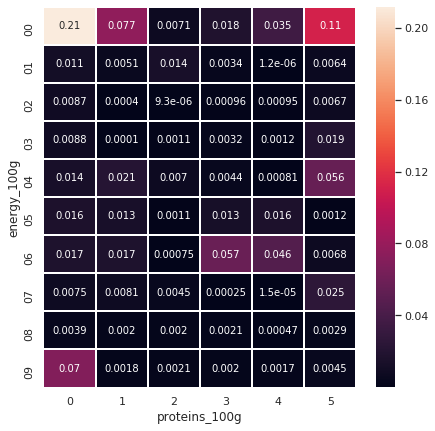

<Figure size 432x288 with 0 Axes>

proteins_100g,0,1,2,3,4,5
energy_100g,,,,,,
00,0.211675,0.076604,0.007113,0.017933,0.035375,0.111518
01,0.010754,0.005150,0.013673,0.003427,0.000001,0.006363
02,0.008667,0.000400,0.000009,0.000958,0.000952,0.006667
03,0.008805,0.000101,0.001148,0.003168,0.001202,0.019492
04,0.013580,0.020764,0.006962,0.004361,0.000808,0.056078
05,0.016113,0.013437,0.001132,0.013056,0.015956,0.001211
06,0.017004,0.016608,0.000748,0.057131,0.046066,0.006812
07,0.007489,0.008140,0.004461,0.000246,0.000015,0.025229
08,0.003869,0.002022,0.001993,0.002141,0.000467,0.002902


In [161]:

fig, ax = plt.subplots(figsize=(7,7))    


tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dataScoreTest)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n


fig = plt.figure(figsize=(6, 4))

ax = sns.heatmap(table.iloc[:-1,:-1],annot=True, linewidths=.5, ax=ax)

plt.show()
table.iloc[:-1,:-1]

Ce tableaux de contributions indiquent que les aliments dont l'énergie est comprise entre 1005 et 2345 kj/100g et un taux de protéine > 6.4 % sont le moins indépendant.           
              


In [162]:
from scipy.stats import chi2_contingency
obs = dataScoreTest[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
obs

proteins_100g,0,1,2,3,4,5
energy_100g,,,,,,
00,9052,6567,3503,962,402,850
01,1129,2983,2980,2386,1882,4082
02,823,1853,1406,1104,1160,5304
03,714,1439,990,797,1023,5739
04,1069,720,1078,1239,2278,9819
05,305,377,868,1997,2161,3816
06,230,223,861,2845,2745,2100
07,104,75,139,391,510,2778
08,350,30,15,10,80,645


In [163]:
chi2_contingency(obs)

(52962.55349295736,
 0.0,
 45,
 array([[3129.13776, 3049.55448, 2527.2492 , 2504.20632, 2615.7936 ,
         7510.05864],
        [2264.72372, 2207.12506, 1829.1049 , 1812.42754, 1893.1892 ,
         5435.42958],
        [1708.589  , 1665.1345 , 1379.9425 , 1367.3605 , 1428.29   ,
         4100.6835 ],
        [1569.55532, 1529.63686, 1267.6519 , 1256.09374, 1312.0652 ,
         3766.99698],
        [2376.33198, 2315.89479, 1919.24535, 1901.74611, 1986.4878 ,
         5703.29397],
        [1396.78984, 1361.26532, 1128.1178 , 1117.83188, 1167.6424 ,
         3352.35276],
        [1320.52664, 1286.94172, 1066.5238 , 1056.79948, 1103.8904 ,
         3169.31796],
        [ 586.20002,  571.29121,  473.44465,  469.12789,  490.0322 ,
         1406.90403],
        [ 165.7258 ,  161.5109 ,  133.8485 ,  132.6281 ,  138.538  ,
          397.7487 ],
        [ 148.41992,  144.64516,  119.8714 ,  118.77844,  124.0712 ,
          356.21388]]))

La p-valeur = 0.0 : nous pouvons rejeter l'hypothèse que les variables energy et proteins sont indépendantes

In [164]:
classTest.loc["Khi2","10*6"] = chi2_contingency(obs)[1]

### classification sur ANOVA

In [165]:
grouped = dataScoreTest.groupby(["sugars_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
sugars_100g,,,,,,
00,8906,-1.285762,4.694074,0.049740,-1.383253,-1.188271
01,23268,2.988611,6.276504,0.041147,2.907963,3.069259
02,15265,5.036685,6.777970,0.054859,4.929161,5.144210
03,9393,5.463750,6.976215,0.071981,5.322667,5.604832
04,10549,3.690871,8.173826,0.079583,3.534889,3.846854
05,5540,12.508123,6.271706,0.084262,12.342970,12.673276
06,4200,13.977619,6.516469,0.100551,13.780538,14.174700
07,3707,15.669005,6.634894,0.108974,15.455416,15.882594
08,2881,15.852829,7.116042,0.132577,15.592979,16.112679


In [166]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


00 p = 1.30308e-08  : The null hypothesis can be rejected
01 p = 5.31556e-306  : The null hypothesis can be rejected
02 p = 9.03657e-248  : The null hypothesis can be rejected
03 p = 6.70503e-92  : The null hypothesis can be rejected
04 p = 0  : The null hypothesis can be rejected
05 p = 9.46111e-50  : The null hypothesis can be rejected
06 p = 7.91057e-47  : The null hypothesis can be rejected
07 p = 2.79853e-66  : The null hypothesis can be rejected
08 p = 1.01693e-40  : The null hypothesis can be rejected
09 p = 1.49711e-90  : The null hypothesis can be rejected


In [167]:
model = ols('nutriscore_score ~ C(sugars_100g)', dataScoreTest).fit()

In [168]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(sugars_100g),3.507589e+06,9.0,8923.120988,0.0
Residual,4.367229e+06,99990.0,NaN,NaN


In [169]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(sugars_100g),3.507589e+06,389732.129158,9.0,8923.120988,0.0,0.445418,0.445366
Residual,4.367229e+06,43.676661,99990.0,NaN,NaN,NaN,NaN


In [170]:
# EchTest.loc["ANOVA","1000"] = anova_table(res).loc["C(sugars_100g)","PR(>F)"]

classTest.loc["ANOVA","10*6"] = anova_table(res).loc["C(sugars_100g)","PR(>F)"]
print(anova_table(res).loc["C(sugars_100g)","PR(>F)"])

0.0


### classification sur TTest

In [171]:
grouped = dataScoreTest.groupby(["energy_100g"])
rp.summary_cont(grouped)['nutriscore_score']

,N,Mean,SD,SE,95% Conf.,Interval
energy_100g,,,,,,
00,21336,1.828084,6.571677,0.044990,1.739903,1.916265
01,15442,2.273540,5.338879,0.042963,2.189331,2.357748
02,11650,6.111073,6.133283,0.056824,5.999698,6.222448
03,10702,9.074659,7.375160,0.071292,8.934927,9.214391
04,16203,6.517929,9.222829,0.072455,6.375918,6.659940
05,9524,14.258715,6.863366,0.070328,14.120872,14.396557
06,9004,18.021435,6.656909,0.070154,17.883932,18.158938
07,3997,12.929447,9.244647,0.146226,12.642845,13.216049
08,1130,11.327434,9.279579,0.276051,10.786374,11.868493


In [172]:
for name, group in grouped  :
    
    df = grouped.get_group(name)
    k2, p = stats.normaltest(df["nutriscore_score"])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    else:
        print(name, " : The null hypothesis cannot be rejected")


00 p = 2.49169e-265  : The null hypothesis can be rejected
01 p = 2.68243e-261  : The null hypothesis can be rejected
02 p = 1.1224e-116  : The null hypothesis can be rejected
03 p = 3.08366e-276  : The null hypothesis can be rejected
04 p = 0  : The null hypothesis can be rejected
05 p = 7.91238e-73  : The null hypothesis can be rejected
06 p = 1.61776e-143  : The null hypothesis can be rejected
07 p = 2.84017e-162  : The null hypothesis can be rejected
08 p = 5.25383e-277  : The null hypothesis can be rejected
09 p = 1.10603e-46  : The null hypothesis can be rejected


In [173]:
A = dataScoreTest.loc[dataScoreTest['energy_100g'] == "00"]["nutriscore_score"]
B = dataScoreTest.loc[dataScoreTest['energy_100g'] == "03"]["nutriscore_score"]

In [174]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=-89.30243767302312, pvalue=0.0)

On rejette l'hypothèse que le la valeur élergétique n'a pas d'influmence sur le nutriscore

In [175]:



classTest.loc["TTest","10*6"] = stats.ttest_ind(A,B)[1]

print("la p-valeur du TTest est de ", stats.ttest_ind(A,B)[1])

la p-valeur du TTest est de  0.0


In [176]:
classTest

,3*3,10*6
Khi2,0.0,0.0
ANOVA,0.0,0.0
TTest,0.0,0.0


# Identification de modèles du nutriscore 


In [177]:
d = {
    'R2': [0, 0, 0, 0],
    'RMSE': [0, 0, 0, 0],
    'MAE': [0, 0, 0, 0]}
resultatNutri= pd.DataFrame(data=d, index=["regLin", "knn", "regLinACP", "knnACP" ] )
resultatNutri

,R2,RMSE,MAE
regLin,0,0,0
knn,0,0,0
regLinACP,0,0,0
knnACP,0,0,0


In [178]:
dataScaled

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,0.585365,-0.198033,0.138163,-0.086455,-0.000366,0.090800,28.970000
1,moutarde au moût de raisin,18.0,-0.234327,-0.319826,0.543014,-0.640046,-0.330399,0.811190,31.111024
2,Sauce Sweety chili 0%,NaN,-1.332430,-0.624309,-0.706238,-0.273481,-0.929348,0.238215,3.091263
3,Mini coco,NaN,-1.121356,-0.485908,-0.555865,-0.294556,-0.709326,0.033216,8.038947
4,Sachet calisson,NaN,-0.015666,-0.611853,2.363743,0.355579,-0.822554,-0.231670,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,0.455872,-0.624309,-0.729373,-0.348683,-0.098154,-0.231670,8.331579
864417,Boules,NaN,0.568531,-0.444387,2.393757,0.280110,-0.183718,-0.227064,65.813263
864418,Minis beignets,15.0,0.357457,0.206099,-0.127881,0.052777,-0.049260,0.021699,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.248571,0.040017,0.658685,-0.559432,-0.635985,-0.167176,31.880421


## Regression linéaire

dataScaledTrain.shape[0] > 0  288640
error in lin reg :  41.647656705841584


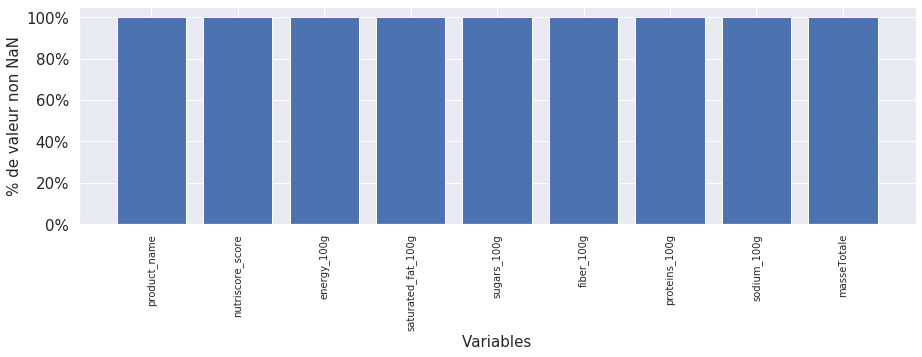

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,0.585365,-0.198033,0.138163,-0.086455,-0.000366,0.090800,28.970000
1,moutarde au moût de raisin,18.0,-0.234327,-0.319826,0.543014,-0.640046,-0.330399,0.811190,31.111024
2,Sauce Sweety chili 0%,NaN,-1.332430,-0.624309,-0.706238,-0.273481,-0.929348,0.238215,3.091263
3,Mini coco,NaN,-1.121356,-0.485908,-0.555865,-0.294556,-0.709326,0.033216,8.038947
4,Sachet calisson,NaN,-0.015666,-0.611853,2.363743,0.355579,-0.822554,-0.231670,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,0.455872,-0.624309,-0.729373,-0.348683,-0.098154,-0.231670,8.331579
864417,Boules,NaN,0.568531,-0.444387,2.393757,0.280110,-0.183718,-0.227064,65.813263
864418,Minis beignets,15.0,0.357457,0.206099,-0.127881,0.052777,-0.049260,0.021699,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.248571,0.040017,0.658685,-0.559432,-0.635985,-0.167176,31.880421


In [179]:
# reinitialisation de dataCompleted : 
dataCompleted = dataCompletedClean.copy()


colTarget=['nutriscore_score']
         
colfit = ["energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]


testSize = 300000

colAll =colTarget + colfit

dataScaledTrain = dataScaled.dropna(subset=colAll).loc[:, colAll]


if dataScaledTrain.shape[0] > 0 : 
    print("dataScaledTrain.shape[0] > 0 ",dataScaledTrain.shape[0] )

    
    taille_test = min(testSize, dataScaledTrain.shape[0])

    sample = random.sample(list(dataScaledTrain.index), k=taille_test)
    # sample =list(dataScaledTrain.index)

    dataScaledNutri = dataScaledTrain.loc[sample, colfit]
    targetNutri = dataScaledTrain.loc[sample,colTarget]
    xtrain, xtest, ytrain, ytest = train_test_split(
        dataScaledNutri, targetNutri, train_size=0.8)

    errors = []
    
    reg = LinearRegression().fit(xtrain, ytrain)
    
    print("error in lin reg : ", 100*(1- reg.score(xtest, ytest) ))
    
#     for k in range(2, 20):
#         knn = KNeighborsRegressor(k)
#         errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
#     plt.plot(range(2, 20), errors, 'o-')
#     plt.show()
    
    dataScaledTrain = dataScaled.dropna(subset=colAll).loc[:, colAll]
    dataScaledPredicted = dataScaled.dropna(subset=colfit).loc[:, colfit]
    dataScaledPredicted = dataScaledPredicted.drop(dataScaledTrain.index)
          

#     dataScaledTrain = dataScaled.dropna(subset=colAll).loc[:, colAll]
#     dataScaledPredicted = dataScaled.dropna(subset=colfit).loc[:, colfit]
#     dataScaledPredicted = dataScaledPredicted.drop(dataScaledTrain.index)

    if dataScaledPredicted.shape[0] > 0 : 
        nutriPredict = reg.predict(dataScaledPredicted)
        dataCompleted.loc[dataScaledPredicted.index, colTarget] = nutriPredict


    xlabel = dataCompleted.columns
    fig = plt.figure(figsize=(15, 4))
    plot = fig.add_subplot(1, 1, 1)
    plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=15)


    fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
    xxticks = mtick.FormatStrFormatter(fmt)

    # yaxis

    plot.yaxis.set_major_formatter(xxticks)

    plt.xlabel("Variables", fontsize=15)
    plt.ylabel("% de valeur non NaN", fontsize=15)


    plt.show()
dataScaled

### R2 coefficient of determination



  $${\displaystyle R^{2}=1-{\frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}$$
où n est le nombre de mesures, ${\displaystyle y_{i}}$ la valeur de la mesure $no i$, ${\displaystyle {\hat {y_{i}}}}$ la valeur prédite correspondante et ${\displaystyle {\bar {y}}} $ la moyenne des mesures. R2 est généralement compris entre 0 et 1 


**R2 = 1 indique que la regression correspond exactement aux données.**


In [180]:
>>> from sklearn.metrics import r2_score
>>> y_true = ytest
>>> y_pred = reg.predict(xtest)

Error = r2_score(y_true, y_pred)
>>> print("R2", Error)

resultatNutri.loc["regLin", "R2"] = Error

R2 0.5835234329415842


### RMSE Root-mean-square error



If a vector of ${\displaystyle n}$ predictions generated from a sample of n data points on all variables, and ${\displaystyle Y}$ is the vector of observed values of the variable being predicted, with ${\displaystyle {\hat {Y_{i}}}}$ being the predicted values (e.g. as from a least-squares fit), then the within-sample MSE of the predictor is computed as

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$
I.e., the MSE is the mean ${\displaystyle \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$ of the squares of the errors ${\displaystyle (Y_{i}-{\hat {Y_{i}}})^{2}}$. This is an easily computable quantity for a particular sample (and hence is sample-dependent).

$\operatorname {RMSE} = {\displaystyle \sqrt{ \operatorname {MSE}      }    }$


The MSE is a measure of the quality of an estimator—it is always non-negative, **and values closer to zero are better.**

In [181]:
>>> from sklearn.metrics import mean_squared_error
# >>> print("RMSE", np.sqrt(mean_squared_error(y_true, y_pred)))

Error = np.sqrt(mean_squared_error(y_true, y_pred))

>>> print("RMSE", Error)

resultatNutri.loc["regLin", "RMSE"] = Error



RMSE 5.665597481972165


In [182]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [183]:
print("MAPE", mean_absolute_percentage_error(y_true, y_pred))

MAPE inf


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### MAE mean absolute error


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$

The mean absolute error ($\text{MAE}$) is an average of the absolute errors ${\displaystyle |e_{i}|=|y_{i}-x_{i}|}$, where ${\displaystyle y_{i}}$ is the prediction and ${\displaystyle x_{i}}$ the true value



In [184]:
from sklearn.metrics import mean_absolute_error
# >>> print("MAE", mean_absolute_error(y_true, y_pred))
Error = mean_absolute_error(y_true, y_pred)
print("MAE", Error)

resultatNutri.loc["regLin", "MAE"] = Error


MAE 4.556278372285303


## Knn

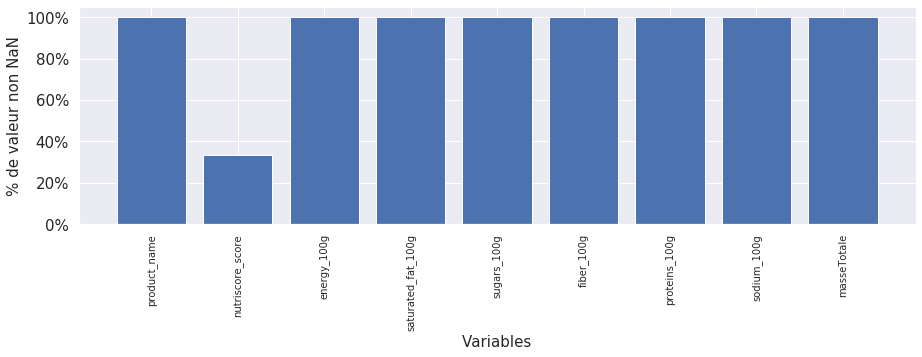

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,1569.000000,3.08,15.000000,2.530000,7.800000,0.560000,28.970000
1,moutarde au moût de raisin,18.0,936.000000,2.20,22.000000,0.000000,5.100000,1.811024,31.111024
2,Sauce Sweety chili 0%,NaN,88.000000,0.00,0.400000,1.675263,0.200000,0.816000,3.091263
3,Mini coco,NaN,251.000000,1.00,3.000000,1.578947,2.000000,0.460000,8.038947
4,Sachet calisson,NaN,1104.859113,0.09,53.481053,4.550166,1.073684,0.000000,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,1469.000000,0.00,0.000000,1.331579,7.000000,0.000000,8.331579
864417,Boules,NaN,1556.000000,1.30,54.000000,4.205263,6.300000,0.008000,65.813263
864418,Minis beignets,15.0,1393.000000,6.00,10.400000,3.166316,7.400000,0.440000,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,925.000000,4.80,24.000000,0.368421,2.600000,0.112000,31.880421


In [185]:
# reinitialisation de dataCompleted : 
dataCompleted = dataCompletedClean.copy()

xlabel = dataCompleted.columns
fig = plt.figure(figsize=(15, 4))
plot = fig.add_subplot(1, 1, 1)
plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
xxticks = mtick.FormatStrFormatter(fmt)

# yaxis

plot.yaxis.set_major_formatter(xxticks)

plt.xlabel("Variables", fontsize=15)
plt.ylabel("% de valeur non NaN", fontsize=15)


plt.show()

dataCompleted


dataScaledTrain.shape[0] 288640


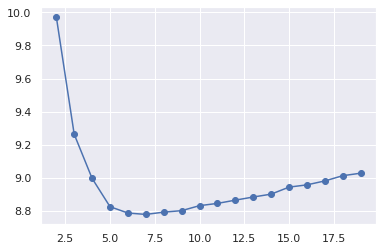

hyper parametre k optimal : 7
erreur minimale :  8.779588786423421
dataScaledPredicted.shape[0] (575160, 6)


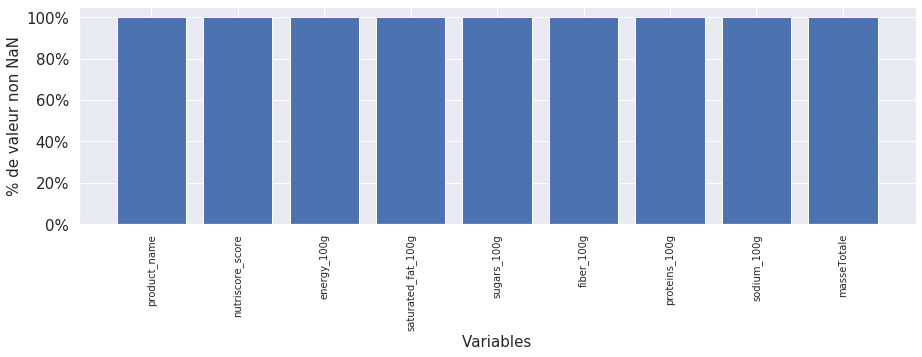

In [186]:
colTarget=['nutriscore_score']

colfit = ["energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]


testSize = 300000

colAll =colTarget + colfit

dataScaledTrain = dataScaled.dropna(subset=colAll).loc[:,colAll]

if dataScaledTrain.shape[0] > 0 : 

    taille_test = min(testSize, dataScaledTrain.shape[0])

    print("dataScaledTrain.shape[0]", dataScaledTrain.shape[0])
    sample = random.sample(list(dataScaledTrain.index), k=taille_test)
    # sample =list(dataScaledTrain.index)

    dataScaledNutri = dataScaledTrain.loc[sample, colfit]
    targetNutri = dataScaledTrain.loc[sample,colTarget]

    xtrain, xtest, ytrain, ytest = train_test_split(
        dataScaledNutri, targetNutri, train_size=0.8)

    errors = []
    for k in range(2, 20):
        knn = KNeighborsRegressor(k)
        errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
    plt.plot(range(2, 20), errors, 'o-')
    plt.show()


    print( "hyper parametre k optimal :" , errors.index(min(errors))+2)
    print( "erreur minimale : " , min(errors))


    k = errors.index(min(errors))+2
    knn = KNeighborsRegressor(k)
    knn.fit(xtrain, ytrain)


    dataScaledTrain = dataScaled.dropna(subset=colAll).loc[:, colAll]

    dataScaledPredicted = dataScaled.dropna(subset=colfit).loc[:, colfit]


    dataScaledPredicted = dataScaledPredicted.drop(dataScaledTrain.index)

    print("dataScaledPredicted.shape[0]", dataScaledPredicted.shape)
    if dataScaledPredicted.shape[0] > 0 : 
        fiberPredict = knn.predict(dataScaledPredicted)
        dataCompleted.loc[dataScaledPredicted.index, colTarget] = fiberPredict


    xlabel = dataCompleted.columns
    fig = plt.figure(figsize=(15, 4))
    plot = fig.add_subplot(1, 1, 1)
    plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=15)


    fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
    xxticks = mtick.FormatStrFormatter(fmt)

    # yaxis

    plot.yaxis.set_major_formatter(xxticks)

    plt.xlabel("Variables", fontsize=15)
    plt.ylabel("% de valeur non NaN", fontsize=15)


    plt.show()




### R2 coefficient of determination



  $${\displaystyle R^{2}=1-{\frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}$$
où n est le nombre de mesures, ${\displaystyle y_{i}}$ la valeur de la mesure n° $i$, ${\displaystyle {\hat {y_{i}}}}$ la valeur prédite correspondante et ${\displaystyle {\bar {y}}} $ la moyenne des mesures. R2 est généralement compris entre 0 et 1 


**R2 = 1 indique que la regression correspond exactement aux données.**

In [187]:
>>> from sklearn.metrics import r2_score
>>> y_true = ytest
>>> y_pred = knn.predict(xtest)

Error = r2_score(y_true, y_pred)
>>> print("R2", Error)

resultatNutri.loc["knn", "R2"] = Error



R2 0.9122041121357658


### RMSE Root-mean-square error



If a vector of ${\displaystyle n}$ predictions generated from a sample of n data points on all variables, and ${\displaystyle Y}$ is the vector of observed values of the variable being predicted, with ${\displaystyle {\hat {Y_{i}}}}$ being the predicted values (e.g. as from a least-squares fit), then the within-sample MSE of the predictor is computed as

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$
I.e., the MSE is the mean ${\displaystyle \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$ of the squares of the errors ${\displaystyle (Y_{i}-{\hat {Y_{i}}})^{2}}$. This is an easily computable quantity for a particular sample (and hence is sample-dependent).

$\operatorname {RMSE} = {\displaystyle \sqrt{ \operatorname {MSE}      }    }$

The MSE is a measure of the quality of an estimator—it is always non-negative, **and values closer to zero are better.**

In [188]:
>>> from sklearn.metrics import mean_squared_error
# >>> print("RMSE", np.sqrt(mean_squared_error(y_true, y_pred)))

Error = np.sqrt(mean_squared_error(y_true, y_pred))

>>> print("RMSE", Error)

resultatNutri.loc["knn", "RMSE"] = Error


RMSE 2.60939944799703


In [189]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [190]:
print("MAPE", mean_absolute_percentage_error(y_true, y_pred))

MAPE nan


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### MAE mean absolute error


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$

The mean absolute error ($\text{MAE}$) is an average of the absolute errors ${\displaystyle |e_{i}|=|y_{i}-x_{i}|}$, where ${\displaystyle y_{i}}$ is the prediction and ${\displaystyle x_{i}}$ the true value



In [191]:
from sklearn.metrics import mean_absolute_error
# >>> print("MAE", mean_absolute_error(y_true, y_pred))
Error = mean_absolute_error(y_true, y_pred)
print("MAE", Error)

resultatNutri.loc["knn", "MAE"] = Error

MAE 1.4932392302819135


In [192]:
resultatNutri

,R2,RMSE,MAE
regLin,0.583523,5.665597,4.556278
knn,0.912204,2.609399,1.493239
regLinACP,0.000000,0.000000,0.000000
knnACP,0.000000,0.000000,0.000000


## Regression linéaire avec ACP

In [193]:

# selection des colonnes à prendre en compte dans l'ACP
data_pca = dataScaled[["energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]]

# préparation des données pour l'ACP
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
# data_pca = dataTrain.fillna(data_pca.mean())
X_scaled = data_pca.values

# Projection des individus
X_projected = pca.transform(X_scaled)

dataScaledACP = dataScaled.copy()
dataScaledACP.shape
dataScaledACP.loc[:,"energy_100g":"sodium_100g"] = X_projected


dataScaledACP = dataScaledACP.rename(columns={"energy_100g": "F1"})
dataScaledACP = dataScaledACP.rename(columns={"saturated_fat_100g": "F2"})
dataScaledACP = dataScaledACP.rename(columns={"sugars_100g": "F3"})
dataScaledACP = dataScaledACP.rename(columns={"fiber_100g": "F4"})
dataScaledACP = dataScaledACP.rename(columns={"proteins_100g": "F5"})
dataScaledACP = dataScaledACP.rename(columns={"sodium_100g": "F6"})

dataScaledACP

,product_name,nutriscore_score,F1,F2,F3,F4,F5,F6,masseTotale
0,Vitória crackers,NaN,0.287243,-0.111871,0.071905,0.126843,-0.208049,-0.507061,28.970000
1,moutarde au moût de raisin,18.0,-0.514496,-0.488037,0.869945,0.448600,-0.408114,-0.037730,31.111024
2,Sauce Sweety chili 0%,NaN,-1.790982,0.092274,0.157259,0.108285,0.617761,0.157841,3.091263
3,Mini coco,NaN,-1.471481,0.027942,0.035704,-0.048906,0.440843,0.171743,8.038947
4,Sachet calisson,NaN,0.053957,-1.884584,-0.607887,1.472643,-0.799873,0.293302,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,-0.348046,0.319794,-0.156121,-0.365703,-0.011997,-0.965811,8.331579
864417,Boules,NaN,0.732905,-1.618786,-0.516389,1.243990,-1.196349,0.107308,65.813263
864418,Minis beignets,15.0,0.317337,0.009944,0.066482,-0.082581,0.194684,-0.205782,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.377644,-1.024869,0.134051,-0.042015,-0.118182,0.126374,31.880421


In [194]:
dataScaledACP

,product_name,nutriscore_score,F1,F2,F3,F4,F5,F6,masseTotale
0,Vitória crackers,NaN,0.287243,-0.111871,0.071905,0.126843,-0.208049,-0.507061,28.970000
1,moutarde au moût de raisin,18.0,-0.514496,-0.488037,0.869945,0.448600,-0.408114,-0.037730,31.111024
2,Sauce Sweety chili 0%,NaN,-1.790982,0.092274,0.157259,0.108285,0.617761,0.157841,3.091263
3,Mini coco,NaN,-1.471481,0.027942,0.035704,-0.048906,0.440843,0.171743,8.038947
4,Sachet calisson,NaN,0.053957,-1.884584,-0.607887,1.472643,-0.799873,0.293302,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,-0.348046,0.319794,-0.156121,-0.365703,-0.011997,-0.965811,8.331579
864417,Boules,NaN,0.732905,-1.618786,-0.516389,1.243990,-1.196349,0.107308,65.813263
864418,Minis beignets,15.0,0.317337,0.009944,0.066482,-0.082581,0.194684,-0.205782,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.377644,-1.024869,0.134051,-0.042015,-0.118182,0.126374,31.880421


dataScaledTrain.shape[0] > 0  288640
error in lin reg :  41.76084702389702


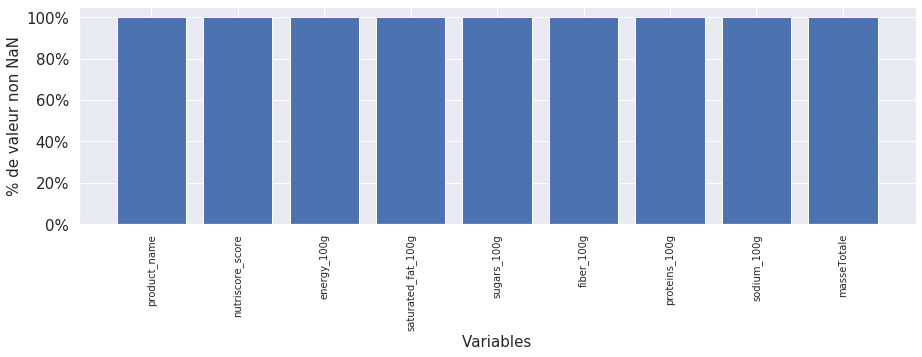

In [195]:
# reinitialisation de dataCompleted : 
dataCompleted = dataCompletedClean.copy()


colTarget=['nutriscore_score']
         
colfit = ["F1","F2","F3","F4","F5","F6"]


testSize = 300000

colAll =colTarget + colfit

dataScaledTrain = dataScaledACP.dropna(subset=colAll).loc[:, colAll]


if dataScaledTrain.shape[0] > 0 : 
    print("dataScaledTrain.shape[0] > 0 ",dataScaledTrain.shape[0] )

    
    taille_test = min(testSize, dataScaledTrain.shape[0])

    sample = random.sample(list(dataScaledTrain.index), k=taille_test)
    # sample =list(dataScaledTrain.index)

    dataScaledNutri = dataScaledTrain.loc[sample, colfit]
    targetNutri = dataScaledTrain.loc[sample,colTarget]
    xtrain, xtest, ytrain, ytest = train_test_split(
        dataScaledNutri, targetNutri, train_size=0.8)

    errors = []
    
    reg = LinearRegression().fit(xtrain, ytrain)
    
    print("error in lin reg : ", 100*(1- reg.score(xtest, ytest) ))
    
#     for k in range(2, 20):
#         knn = KNeighborsRegressor(k)
#         errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
#     plt.plot(range(2, 20), errors, 'o-')
#     plt.show()
    
    dataScaledTrain = dataScaledACP.dropna(subset=colAll).loc[:, colAll]
    dataScaledPredicted = dataScaledACP.dropna(subset=colfit).loc[:, colfit]
    dataScaledPredicted = dataScaledPredicted.drop(dataScaledTrain.index)
          


    if dataScaledPredicted.shape[0] > 0 : 
        nutriPredict = reg.predict(dataScaledPredicted)
        dataCompleted.loc[dataScaledPredicted.index, colTarget] = nutriPredict


    xlabel = dataCompleted.columns
    fig = plt.figure(figsize=(15, 4))
    plot = fig.add_subplot(1, 1, 1)
    plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=15)


    fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
    xxticks = mtick.FormatStrFormatter(fmt)

    # yaxis

    plot.yaxis.set_major_formatter(xxticks)

    plt.xlabel("Variables", fontsize=15)
    plt.ylabel("% de valeur non NaN", fontsize=15)


    plt.show()

In [196]:
dataScaledACP

,product_name,nutriscore_score,F1,F2,F3,F4,F5,F6,masseTotale
0,Vitória crackers,NaN,0.287243,-0.111871,0.071905,0.126843,-0.208049,-0.507061,28.970000
1,moutarde au moût de raisin,18.0,-0.514496,-0.488037,0.869945,0.448600,-0.408114,-0.037730,31.111024
2,Sauce Sweety chili 0%,NaN,-1.790982,0.092274,0.157259,0.108285,0.617761,0.157841,3.091263
3,Mini coco,NaN,-1.471481,0.027942,0.035704,-0.048906,0.440843,0.171743,8.038947
4,Sachet calisson,NaN,0.053957,-1.884584,-0.607887,1.472643,-0.799873,0.293302,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,-0.348046,0.319794,-0.156121,-0.365703,-0.011997,-0.965811,8.331579
864417,Boules,NaN,0.732905,-1.618786,-0.516389,1.243990,-1.196349,0.107308,65.813263
864418,Minis beignets,15.0,0.317337,0.009944,0.066482,-0.082581,0.194684,-0.205782,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.377644,-1.024869,0.134051,-0.042015,-0.118182,0.126374,31.880421


### R2 coefficient of determination



  $${\displaystyle R^{2}=1-{\frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}$$
où n est le nombre de mesures, ${\displaystyle y_{i}}$ la valeur de la mesure $no i$, ${\displaystyle {\hat {y_{i}}}}$ la valeur prédite correspondante et ${\displaystyle {\bar {y}}} $ la moyenne des mesures. R2 est généralement compris entre 0 et 1 


**R2 = 1 indique que la regression correspond exactement aux données.**


In [197]:
>>> from sklearn.metrics import r2_score
>>> y_true = ytest
>>> y_pred = reg.predict(xtest)

Error = r2_score(y_true, y_pred)
>>> print("R2", Error)

resultatNutri.loc["regLinACP", "R2"] = Error

R2 0.5823915297610298


### RMSE Root-mean-square error



If a vector of ${\displaystyle n}$ predictions generated from a sample of n data points on all variables, and ${\displaystyle Y}$ is the vector of observed values of the variable being predicted, with ${\displaystyle {\hat {Y_{i}}}}$ being the predicted values (e.g. as from a least-squares fit), then the within-sample MSE of the predictor is computed as

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$
I.e., the MSE is the mean ${\displaystyle \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$ of the squares of the errors ${\displaystyle (Y_{i}-{\hat {Y_{i}}})^{2}}$. This is an easily computable quantity for a particular sample (and hence is sample-dependent).

$\operatorname {RMSE} = {\displaystyle \sqrt{ \operatorname {MSE}      }    }$


The MSE is a measure of the quality of an estimator—it is always non-negative, **and values closer to zero are better.**

In [198]:
>>> from sklearn.metrics import mean_squared_error
# >>> print("RMSE", np.sqrt(mean_squared_error(y_true, y_pred)))

Error = np.sqrt(mean_squared_error(y_true, y_pred))

>>> print("RMSE", Error)

resultatNutri.loc["regLinACP", "RMSE"] = Error



RMSE 5.67303602395748


In [199]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [200]:
print("MAPE", mean_absolute_percentage_error(y_true, y_pred))

MAPE inf


/home/ious/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### MAE mean absolute error


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$

The mean absolute error ($\text{MAE}$) is an average of the absolute errors ${\displaystyle |e_{i}|=|y_{i}-x_{i}|}$, where ${\displaystyle y_{i}}$ is the prediction and ${\displaystyle x_{i}}$ the true value



In [201]:
from sklearn.metrics import mean_absolute_error
# >>> print("MAE", mean_absolute_error(y_true, y_pred))
Error = mean_absolute_error(y_true, y_pred)
print("MAE", Error)

resultatNutri.loc["regLinACP", "MAE"] = Error


MAE 4.562585330364734


## Knn avec ACP

In [202]:

# selection des colonnes à prendre en compte dans l'ACP
data_pca = dataScaled[["energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]]

# préparation des données pour l'ACP
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
# data_pca = dataTrain.fillna(data_pca.mean())

X_scaled = data_pca.values


print("X_scaled", X_scaled,X_scaled.shape[0] )

# Projection des individus
X_projected = pca.transform(X_scaled)

dataScaledACP = dataScaled.copy()
dataScaledACP.shape
dataScaledACP.loc[:,"energy_100g":"sodium_100g"] = X_projected


dataScaledACP = dataScaledACP.rename(columns={"energy_100g": "F1"})
dataScaledACP = dataScaledACP.rename(columns={"saturated_fat_100g": "F2"})
dataScaledACP = dataScaledACP.rename(columns={"sugars_100g": "F3"})
dataScaledACP = dataScaledACP.rename(columns={"fiber_100g": "F4"})
dataScaledACP = dataScaledACP.rename(columns={"proteins_100g": "F5"})
dataScaledACP = dataScaledACP.rename(columns={"sodium_100g": "F6"})

dataScaledACP

X_scaled [[ 5.85365341e-01 -1.98032975e-01  1.38163414e-01 -8.64553685e-02
  -3.66375550e-04  9.08000192e-02]
 [-2.34326968e-01 -3.19826159e-01  5.43013568e-01 -6.40046384e-01
  -3.30399274e-01  8.11189723e-01]
 [-1.33242978e+00 -6.24309120e-01 -7.06238336e-01 -2.73480917e-01
  -9.29347866e-01  2.38215113e-01]
 ...
 [ 3.57457211e-01  2.06098954e-01 -1.27880973e-01  5.27773208e-02
  -4.92601382e-02  2.16991941e-02]
 [-2.48571226e-01  4.00173394e-02  6.58685040e-01 -5.59431924e-01
  -6.35985290e-01 -1.67176394e-01]
 [-7.36760800e-01 -3.05986025e-01 -7.29372631e-01 -6.34288208e-01
   1.67424500e+00 -1.90210003e-01]] 863800


,product_name,nutriscore_score,F1,F2,F3,F4,F5,F6,masseTotale
0,Vitória crackers,NaN,0.287243,-0.111871,0.071905,0.126843,-0.208049,-0.507061,28.970000
1,moutarde au moût de raisin,18.0,-0.514496,-0.488037,0.869945,0.448600,-0.408114,-0.037730,31.111024
2,Sauce Sweety chili 0%,NaN,-1.790982,0.092274,0.157259,0.108285,0.617761,0.157841,3.091263
3,Mini coco,NaN,-1.471481,0.027942,0.035704,-0.048906,0.440843,0.171743,8.038947
4,Sachet calisson,NaN,0.053957,-1.884584,-0.607887,1.472643,-0.799873,0.293302,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,-0.348046,0.319794,-0.156121,-0.365703,-0.011997,-0.965811,8.331579
864417,Boules,NaN,0.732905,-1.618786,-0.516389,1.243990,-1.196349,0.107308,65.813263
864418,Minis beignets,15.0,0.317337,0.009944,0.066482,-0.082581,0.194684,-0.205782,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.377644,-1.024869,0.134051,-0.042015,-0.118182,0.126374,31.880421


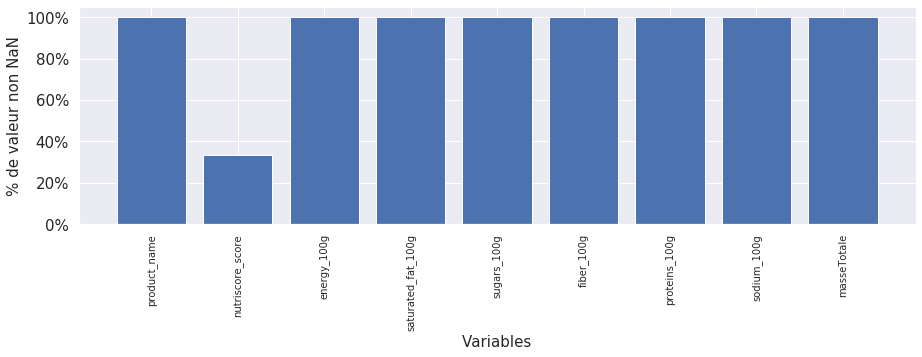

,product_name,nutriscore_score,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,masseTotale
0,Vitória crackers,NaN,1569.000000,3.08,15.000000,2.530000,7.800000,0.560000,28.970000
1,moutarde au moût de raisin,18.0,936.000000,2.20,22.000000,0.000000,5.100000,1.811024,31.111024
2,Sauce Sweety chili 0%,NaN,88.000000,0.00,0.400000,1.675263,0.200000,0.816000,3.091263
3,Mini coco,NaN,251.000000,1.00,3.000000,1.578947,2.000000,0.460000,8.038947
4,Sachet calisson,NaN,1104.859113,0.09,53.481053,4.550166,1.073684,0.000000,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,1469.000000,0.00,0.000000,1.331579,7.000000,0.000000,8.331579
864417,Boules,NaN,1556.000000,1.30,54.000000,4.205263,6.300000,0.008000,65.813263
864418,Minis beignets,15.0,1393.000000,6.00,10.400000,3.166316,7.400000,0.440000,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,925.000000,4.80,24.000000,0.368421,2.600000,0.112000,31.880421


In [203]:
# reinitialisation de dataCompleted : 
dataCompleted = dataCompletedClean.copy()


xlabel = dataCompleted.columns
fig = plt.figure(figsize=(15, 4))
plot = fig.add_subplot(1, 1, 1)
plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
xxticks = mtick.FormatStrFormatter(fmt)

# yaxis

plot.yaxis.set_major_formatter(xxticks)

plt.xlabel("Variables", fontsize=15)
plt.ylabel("% de valeur non NaN", fontsize=15)


plt.show()

dataCompleted


In [204]:
dataScaledACP

,product_name,nutriscore_score,F1,F2,F3,F4,F5,F6,masseTotale
0,Vitória crackers,NaN,0.287243,-0.111871,0.071905,0.126843,-0.208049,-0.507061,28.970000
1,moutarde au moût de raisin,18.0,-0.514496,-0.488037,0.869945,0.448600,-0.408114,-0.037730,31.111024
2,Sauce Sweety chili 0%,NaN,-1.790982,0.092274,0.157259,0.108285,0.617761,0.157841,3.091263
3,Mini coco,NaN,-1.471481,0.027942,0.035704,-0.048906,0.440843,0.171743,8.038947
4,Sachet calisson,NaN,0.053957,-1.884584,-0.607887,1.472643,-0.799873,0.293302,59.194903
...,...,...,...,...,...,...,...,...,...
864416,Riz parfumé,0.0,-0.348046,0.319794,-0.156121,-0.365703,-0.011997,-0.965811,8.331579
864417,Boules,NaN,0.732905,-1.618786,-0.516389,1.243990,-1.196349,0.107308,65.813263
864418,Minis beignets,15.0,0.317337,0.009944,0.066482,-0.082581,0.194684,-0.205782,27.406316
864419,Erdbeerkuchen 1019g tiefgefroren,12.0,-0.377644,-1.024869,0.134051,-0.042015,-0.118182,0.126374,31.880421


dataScaledTrain.shape[0] 288640


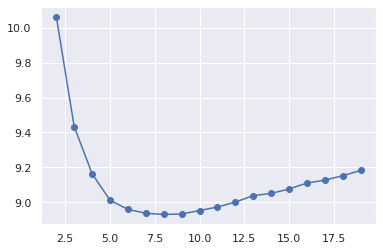

hyper parametre k optimal : 8
erreur minimale :  8.930833816075424
dataScaledPredicted.shape[0] (575160, 6)


TypeError: type numpy.ndarray doesn't define __round__ method

In [205]:
colTarget=['nutriscore_score']

colfit = ["F1","F2","F3","F4","F5","F6"]

testSize = 300000

colAll =colTarget + colfit

dataScaledTrain = dataScaledACP.dropna(subset=colAll).loc[:,colAll]

if dataScaledTrain.shape[0] > 0 : 

    taille_test = min(testSize, dataScaledTrain.shape[0])

    print("dataScaledTrain.shape[0]", dataScaledTrain.shape[0])
    sample = random.sample(list(dataScaledTrain.index), k=taille_test)
    # sample =list(dataScaledTrain.index)

    dataScaledNutri = dataScaledTrain.loc[sample, colfit]
    targetNutri = dataScaledTrain.loc[sample,colTarget]

    xtrain, xtest, ytrain, ytest = train_test_split(
        dataScaledNutri, targetNutri, train_size=0.8)

    errors = []
    for k in range(2, 20):
        knn = KNeighborsRegressor(k)
        errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
    plt.plot(range(2, 20), errors, 'o-')
    plt.show()


    print( "hyper parametre k optimal :" , errors.index(min(errors))+2)
    print( "erreur minimale : " , min(errors))


    k = errors.index(min(errors))+2
    knn = KNeighborsRegressor(k)
    knn.fit(xtrain, ytrain)


    dataScaledTrain = dataScaledACP.dropna(subset=colAll).loc[:, colAll]

    dataScaledPredicted = dataScaledACP.dropna(subset=colfit).loc[:, colfit]


    dataScaledPredicted = dataScaledPredicted.drop(dataScaledTrain.index)

    print("dataScaledPredicted.shape[0]", dataScaledPredicted.shape)
    if dataScaledPredicted.shape[0] > 0 : 
        fiberPredict = knn.predict(dataScaledPredicted)
       
        fiberPredict = [round(x) for x in fiberPredict]
        

        dataCompleted.loc[dataScaledPredicted.index, colTarget] = fiberPredict


    xlabel = dataCompleted.columns
    fig = plt.figure(figsize=(15, 4))
    plot = fig.add_subplot(1, 1, 1)
    plt.bar(xlabel, 100*dataCompleted.count()/dataCompleted.shape[0])
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=15)


    fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
    xxticks = mtick.FormatStrFormatter(fmt)

    # yaxis

    plot.yaxis.set_major_formatter(xxticks)

    plt.xlabel("Variables", fontsize=15)
    plt.ylabel("% de valeur non NaN", fontsize=15)


    plt.show()




In [ ]:
dataCompleted

### R2 coefficient of determination



  $${\displaystyle R^{2}=1-{\frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}$$
où n est le nombre de mesures, ${\displaystyle y_{i}}$ la valeur de la mesure n° $i$, ${\displaystyle {\hat {y_{i}}}}$ la valeur prédite correspondante et ${\displaystyle {\bar {y}}} $ la moyenne des mesures. R2 est généralement compris entre 0 et 1 


**R2 = 1 indique que la regression correspond exactement aux données.**

In [ ]:
>>> from sklearn.metrics import r2_score
>>> y_true = ytest
>>> y_pred = knn.predict(xtest)

Error = r2_score(y_true, y_pred)
>>> print("R2", Error)

resultatNutri.loc["knnACP", "R2"] = Error



### RMSE Root-mean-square error



If a vector of ${\displaystyle n}$ predictions generated from a sample of n data points on all variables, and ${\displaystyle Y}$ is the vector of observed values of the variable being predicted, with ${\displaystyle {\hat {Y_{i}}}}$ being the predicted values (e.g. as from a least-squares fit), then the within-sample MSE of the predictor is computed as

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$
I.e., the MSE is the mean ${\displaystyle \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$ of the squares of the errors ${\displaystyle (Y_{i}-{\hat {Y_{i}}})^{2}}$. This is an easily computable quantity for a particular sample (and hence is sample-dependent).

$\operatorname {RMSE} = {\displaystyle \sqrt{ \operatorname {MSE}      }    }$

The MSE is a measure of the quality of an estimator—it is always non-negative, **and values closer to zero are better.**

In [ ]:
>>> from sklearn.metrics import mean_squared_error
# >>> print("RMSE", np.sqrt(mean_squared_error(y_true, y_pred)))

Error = np.sqrt(mean_squared_error(y_true, y_pred))

>>> print("RMSE", Error)

resultatNutri.loc["knnACP", "RMSE"] = Error


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print("MAPE", mean_absolute_percentage_error(y_true, y_pred))

### MAE mean absolute error


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$

The mean absolute error ($\text{MAE}$) is an average of the absolute errors ${\displaystyle |e_{i}|=|y_{i}-x_{i}|}$, where ${\displaystyle y_{i}}$ is the prediction and ${\displaystyle x_{i}}$ the true value



In [ ]:
from sklearn.metrics import mean_absolute_error
# >>> print("MAE", mean_absolute_error(y_true, y_pred))
Error = mean_absolute_error(y_true, y_pred)
print("MAE", Error)

resultatNutri.loc["knnACP", "MAE"] = Error

In [ ]:
resultatNutri

## Présentation résultats calcul nutri

In [ ]:
d = {    
    'Modèle':       ["regLin", "knn", "regLinACP", "knnACP",\
                    "regLin", "knn", "regLinACP", "knnACP", \
                    "regLin", "knn", "regLinACP", "knnACP"],\
    "type d'erreur":["R2", "R2","R2", "R2","RMSE", "RMSE","RMSE", "RMSE","MAE", "MAE","MAE", "MAE"],\
    'Resuts':       [resultatNutri.loc["regLin","R2"], resultatNutri.loc["knn","R2"], \
                    resultatNutri.loc["regLinACP","R2"], resultatNutri.loc["knnACP","R2"], \
                    resultatNutri.loc["regLin","RMSE"], resultatNutri.loc["knn","RMSE"], \
                    resultatNutri.loc["regLinACP","RMSE"], resultatNutri.loc["knnACP","RMSE"], \
                    resultatNutri.loc["regLin","MAE"], resultatNutri.loc["knn","MAE"], \
                    resultatNutri.loc["regLinACP","MAE"], resultatNutri.loc["knnACP","MAE"]]\
                    }
resultatNutriPlot= pd.DataFrame(data=d)
resultatNutriPlot

In [ ]:
fig = plt.figure(figsize=(15,5))
plot = fig.add_subplot(1,1,1)
sns.set(style="whitegrid")
data = resultatNutriPlot
ax = sns.barplot(x="type d'erreur", y="Resuts", hue="Modèle", data=data)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


plt.xlabel("Type d'erreur", fontsize=15)
plt.ylabel("Resutats", fontsize=15)

plt.legend(fontsize=15)




# Choix du modèle du nutriscore et évaluation


Choix du modèle KNN avec ACP.

Evaluation sur dataTest

In [ ]:

# selection des colonnes à prendre en compte dans l'ACP
data_pca = dataTest[["energy_100g","saturated_fat_100g","sugars_100g","fiber_100g","proteins_100g","sodium_100g"]]

data_pca

# préparation des données pour l'ACP
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.fillna(data_pca.mean())

# data_pca = dataTrain.fillna(data_pca.mean())
# X_scaled = data_pca.values
# names = dataTrainScaled["product_name"]  # ou data.index pour avoir les intitulés
# features = dataTrainScaled.loc[:,"energy_100g":"sodium_100g"].columns
# Centrage et Réduction
# std_scale = preprocessing.StandardScaler().fit(X)

data_pca.loc[:,"energy_100g":"sodium_100g" ] = scaler.transform(data_pca.loc[:,"energy_100g":"sodium_100g" ])

X_scaled = data_pca.loc[:,"energy_100g":"sodium_100g" ].values

# Projection des individus
X_projected = pca.transform(X_scaled)


dataScaledACP = dataTest.copy()

dataScaledACP.loc[:,"energy_100g":"sodium_100g"] = X_projected


dataScaledACP = dataScaledACP.rename(columns={"energy_100g": "F1"})
dataScaledACP = dataScaledACP.rename(columns={"saturated_fat_100g": "F2"})
dataScaledACP = dataScaledACP.rename(columns={"sugars_100g": "F3"})
dataScaledACP = dataScaledACP.rename(columns={"fiber_100g": "F4"})
dataScaledACP = dataScaledACP.rename(columns={"proteins_100g": "F5"})
dataScaledACP = dataScaledACP.rename(columns={"sodium_100g": "F6"})

dataScaledACP

### R2 coefficient of determination



  $${\displaystyle R^{2}=1-{\frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}$$
où n est le nombre de mesures, ${\displaystyle y_{i}}$ la valeur de la mesure n° $i$, ${\displaystyle {\hat {y_{i}}}}$ la valeur prédite correspondante et ${\displaystyle {\bar {y}}} $ la moyenne des mesures. R2 est généralement compris entre 0 et 1 


**R2 = 1 indique que la regression correspond exactement aux données.**

In [ ]:

xtest = dataScaledACP.loc[:,"F1":"F6"]

y_pred = knn.predict(xtest)

y_true=dataScaledACP.loc[:,"nutriscore_score"]

Error = r2_score(y_true, y_pred)
print("R2", Error)

resultatNutri.loc["knnACPTest", "R2"] = Error



In [ ]:
resultatNutri

### RMSE Root-mean-square error



If a vector of ${\displaystyle n}$ predictions generated from a sample of n data points on all variables, and ${\displaystyle Y}$ is the vector of observed values of the variable being predicted, with ${\displaystyle {\hat {Y_{i}}}}$ being the predicted values (e.g. as from a least-squares fit), then the within-sample MSE of the predictor is computed as

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$
I.e., the MSE is the mean ${\displaystyle \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$ of the squares of the errors ${\displaystyle (Y_{i}-{\hat {Y_{i}}})^{2}}$. This is an easily computable quantity for a particular sample (and hence is sample-dependent).

$\operatorname {RMSE} = {\displaystyle \sqrt{ \operatorname {MSE}      }    }$

The MSE is a measure of the quality of an estimator—it is always non-negative, **and values closer to zero are better.**

In [ ]:
>>> from sklearn.metrics import mean_squared_error

Error = np.sqrt(mean_squared_error(y_true, y_pred))

>>> print("RMSE", Error)

resultatNutri.loc["knnACPTest", "RMSE"] = Error


### MAE mean absolute error


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$

The mean absolute error ($\text{MAE}$) is an average of the absolute errors ${\displaystyle |e_{i}|=|y_{i}-x_{i}|}$, where ${\displaystyle y_{i}}$ is the prediction and ${\displaystyle x_{i}}$ the true value



In [ ]:
from sklearn.metrics import mean_absolute_error
# >>> print("MAE", mean_absolute_error(y_true, y_pred))
Error = mean_absolute_error(y_true, y_pred)
print("MAE", Error)

resultatNutri.loc["knnACPTest", "MAE"] = Error

In [ ]:
resultatNutri

## Présentation résultats calcul nutri

In [ ]:
d = {    
    'Modèle':       ["knnACP","knnACPTest","knnACP","knnACPTest", "knnACP","knnACPTest"],\
    "type d'erreur":["R2", "R2","RMSE", "RMSE","MAE", "MAE"],\
    'Resuts':       [resultatNutri.loc["knnACP","R2"], resultatNutri.loc["knnACPTest","R2"], \
                    resultatNutri.loc["knnACP","RMSE"], resultatNutri.loc["knnACPTest","RMSE"], \
                    resultatNutri.loc["knnACP","MAE"], resultatNutri.loc["knnACPTest","MAE"]]\
                    }
resultatNutriPlot= pd.DataFrame(data=d)
resultatNutriPlot

In [ ]:
fig = plt.figure(figsize=(15,5))
plot = fig.add_subplot(1,1,1)
sns.set(style="whitegrid")
data = resultatNutriPlot
ax = sns.barplot(x="type d'erreur", y="Resuts", hue="Modèle", data=data)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# fonction calcul nutri

In [ ]:
dataScaled.loc[:,"nutriscore_score"] = np.round(dataScaled["nutriscore_score"])

In [ ]:
dataCompleted.loc[:,"nutriscore_score"] = dataScaled["nutriscore_score"]

In [ ]:
dataScaled.loc[:,"energy_100g":"sodium_100g"]

In [ ]:
def calculNutri(product_name, energy_100g, saturated_fat_100g, sugars_100g, fiber_100g,proteins_100g,sodium_100g):

    masse = np.nan_to_num(saturated_fat_100g) + np.nan_to_num(sugars_100g) + \
        np.nan_to_num(proteins_100g) + \
        np.nan_to_num(fiber_100g) + np.nan_to_num(sodium_100g)

    if masse > 100:
        print("Attention masse",masse,"> 100 g : risque de résultats erronés ")

    newIndiv = dataScaled.loc[0].copy()

    newIndiv["product_name"] = product_name
    newIndiv["nutriscore_score"] = np.nan
    newIndiv["energy_100g"] = energy_100g
    newIndiv["saturated_fat_100g"] = saturated_fat_100g
    newIndiv["sugars_100g"] = sugars_100g
    newIndiv["proteins_100g"] = proteins_100g
    newIndiv["fiber_100g"] = fiber_100g
    newIndiv["sodium_100g"] = sodium_100g
    newIndiv["masseTotale"] = np.nan

    newIndivScaled = newIndiv.copy()

#     print("newIndivScaled SERIE ", type(newIndivScaled), "\n", newIndivScaled)

    newIndivScaled["energy_100g":"sodium_100g"] = scaler.transform([list(newIndiv["energy_100g":"sodium_100g"]),
                                                                    list(newIndiv["energy_100g":"sodium_100g"])])[0]

    newIndivScaled = newIndivScaled.to_frame().T

    newIndivScaled.index = [dataScaled.index[-1]+1]

    datafit = dataScaled.drop(
        columns=["product_name", "nutriscore_score", "masseTotale"])
    datafit = datafit.append(
        newIndivScaled.loc[:, "energy_100g":"sodium_100g"])

    imputer = KNNImputer(n_neighbors=8)

    newimpute = imputer.fit_transform(datafit)[-1]

    newIndivScaled.loc[:, "energy_100g":"sodium_100g"] = newimpute

    
    
    
    nutri = int(np.round(knn.predict(
        newIndivScaled.loc[:, "energy_100g":"sodium_100g"])[0][0]))

    return nutri

In [ ]:
def calculNutriACP (product_name, energy_100g, saturated_fat_100g, sugars_100g, fiber_100g,proteins_100g,sodium_100g):

    masse = np.nan_to_num(saturated_fat_100g) + np.nan_to_num(sugars_100g) + \
        np.nan_to_num(proteins_100g) + \
        np.nan_to_num(fiber_100g) + np.nan_to_num(sodium_100g)

    if masse > 100:
        print("Attention masse",masse,"> 100 g : risque de résultats erronés ")

    newIndiv = dataScaled.loc[0].copy()

    newIndiv["product_name"] = product_name
    newIndiv["nutriscore_score"] = np.nan
    newIndiv["energy_100g"] = energy_100g
    newIndiv["saturated_fat_100g"] = saturated_fat_100g
    newIndiv["sugars_100g"] = sugars_100g
    newIndiv["proteins_100g"] = proteins_100g
    newIndiv["fiber_100g"] = fiber_100g
    newIndiv["sodium_100g"] = sodium_100g
    newIndiv["masseTotale"] = np.nan

    newIndivScaled = newIndiv.copy()

#     print("newIndivScaled SERIE ", type(newIndivScaled), "\n", newIndivScaled)

    newIndivScaled["energy_100g":"sodium_100g"] = scaler.transform([list(newIndiv["energy_100g":"sodium_100g"]),
                                                                    list(newIndiv["energy_100g":"sodium_100g"])])[0]

    newIndivScaled = newIndivScaled.to_frame().T

    newIndivScaled.index = [dataScaled.index[-1]+1]

    datafit = dataScaled.drop(
        columns=["product_name", "nutriscore_score", "masseTotale"])
    datafit = datafit.append(
        newIndivScaled.loc[:, "energy_100g":"sodium_100g"])

    imputer = KNNImputer(n_neighbors=8)

    newimpute = imputer.fit_transform(datafit)[-1]

    newIndivScaled.loc[:, "energy_100g":"sodium_100g"] = newimpute

    # préparation des données pour l'ACP
    # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
    # data_pca = dataTrain.fillna(data_pca.mean())
    
    X_scaled = newIndivScaled.loc[:, "energy_100g":"sodium_100g"].values


    # Projection des individus
    X_projected = pca.transform(X_scaled)

    newIndivScaled.loc[:,"energy_100g":"sodium_100g"] = X_projected


    newIndivScaled = newIndivScaled.rename(columns={"energy_100g": "F1"})
    newIndivScaled = newIndivScaled.rename(columns={"saturated_fat_100g": "F2"})
    newIndivScaled = newIndivScaled.rename(columns={"sugars_100g": "F3"})
    newIndivScaled = newIndivScaled.rename(columns={"fiber_100g": "F4"})
    newIndivScaled = newIndivScaled.rename(columns={"proteins_100g": "F5"})
    newIndivScaled = newIndivScaled.rename(columns={"sodium_100g": "F6"})
    
    nutri = int(np.round(knn.predict(
        newIndivScaled.loc[:, "F1":"F6"])[0][0]))

    return nutri

In [ ]:
print(dataTest.loc[dataTest["nutriscore_score"]<0].to_latex())

In [ ]:
dataTest.loc[dataTest["nutriscore_score"]>20]

In [ ]:
print(dataTest.loc[26114].to_list())

In [ ]:
calculNutriACP("1 produit" ,   2406.0, 25.0, 50.0, 0.0, 7.5, 0.1016)

In [ ]:
calculNutriACP("1 produit" ,   2406.0, 25.0, 50.0, 0.0, 7.5, np.nan)

In [ ]:
calculNutriACP("1 produit" ,   2406.0, 25.0, 50.0, 0.0, np.nan, np.nan)

In [ ]:
calculNutriACP("1 produit" ,   2406.0, 25.0, 50.0, np.nan, np.nan, np.nan)

In [ ]:
calculNutriACP("1 produit" ,   2406.0, 25.0, np.nan, np.nan, np.nan, np.nan)

In [ ]:
calculNutriACP("1 produit" ,   2406.0, np.nan, np.nan, np.nan, np.nan, np.nan)

In [ ]:
calculNutriACP("1 produit" , np.nan, np.nan, np.nan, np.nan, np.nan, np.nan)

In [ ]:
print(dataTest.loc[26115].to_list())

In [ ]:
calculNutriACP("1 produit" ,1515.0, 0.4, 13.0, 7.6, 9.5, 0.156)

In [ ]:
dataTest.loc[dataTest["nutriscore_score"]==-1]

In [ ]:
print(dataTest.loc[80].to_list())

In [ ]:
calculNutriACP("1 produit" ,138.0, 0.0, 4.58, 0.0, 3.33, 0.0508)

In [ ]:
calculNutriACP("1 produit" ,138.0, 0.0, 4.58, 0.0, 3.33, np.nan)

In [ ]:
calculNutriACP("1 produit" ,138.0, 0.0, 4.58, 0.0, np.nan,np.nan)

In [ ]:
calculNutriACP("1 produit" ,138.0, 0.0, 4.58, np.nan, np.nan, np.nan)

In [ ]:
calculNutriACP("1 produit" ,138.0, 0.0, np.nan, np.nan, np.nan, np.nan)

In [ ]:
calculNutriACP("1 produit" ,138.0, np.nan, np.nan, np.nan, np.nan, np.nan)

In [ ]:
calculNutri("1 produit" ,0,0,0,0,0,0)

In [ ]:
calculNutri("1 produit" ,1594,15.5,21.9,4.4,np.nan,np.nan)

In [ ]:
calculNutri("1 produit" ,1594,15.5,21.9,np.nan,np.nan,np.nan)

In [ ]:
calculNutri("1 produit" ,1594,15.5,np.nan,np.nan,np.nan,np.nan)

In [ ]:
calculNutri("1 produit" ,1594,np.nan,np.nan,np.nan,np.nan,np.nan)

In [ ]:
calculNutri("1 produit" ,np.nan,15.5,np.nan,np.nan,np.nan,np.nan)

In [ ]:
calculNutri("1 produit" ,np.nan,np.nan,np.nan,np.nan,4.6,np.nan)

In [ ]:
print(dataTrain.loc[19].tolist())

In [ ]:
calculNutri("1 produit" ,1025.0, 1.7, 1.5, 0.9, 50, 0.568)

In [ ]:
calculNutri("1 produit" ,657,0,27,3.6,0.6,0)